## Data exploration and preprocessing 

### Data example

In [5]:
from project.src.read_data import read_data

# Load the data

data = read_data('C:\\Users\\chudz\\Desktop\\StudiesF\\MiSD\\Projekt\\data\\data.json')

print(data.head())

        City    Floor Furnished     Market     Price Building type  Area  \
0  Białystok  floor_4       yes  secondary  395000.0          blok  42.0   
1  Białystok  floor_3       yes  secondary  455900.0          blok  39.0   
2  Białystok  floor_0       yes  secondary  700000.0          blok  58.7   
3  Białystok  floor_0        no  secondary  412000.0          blok  56.0   
4  Białystok  floor_1       yes  secondary  585000.0          blok  54.5   

   Rooms  Distance to city center  
0    two                 1.955176  
1  three                 1.824104  
2  three                 2.895974  
3  three                 1.955176  
4  three                 3.387755  


### Processing the data


The data preprocessing phase involves several transformations to tidy up and standardize the data before further analysis. These transformations are crucial for ensuring data consistency and optimizing computational efficiency across the dataset. Specifically, the preprocessing steps include:
    
    Location Transformation

    Floor Level Conversion
    
    Boolean Value Transformation
    
    Market Type Conversion
    
    Room Count Conversion
    
    Building Type Mapping
    
    


In [6]:
from src.process_data import Preprocessor

preprocessor = Preprocessor(data)
print(preprocessor.preprocessed_data.head())


      Price  Area  Distance to city center  Furnished_no  Furnished_yes  \
0  395000.0  42.0                 1.955176           0.0            1.0   
1  455900.0  39.0                 1.824104           0.0            1.0   
2  700000.0  58.7                 2.895974           0.0            1.0   
3  412000.0  56.0                 1.955176           1.0            0.0   
4  585000.0  54.5                 3.387755           0.0            1.0   

   Building type_apartamentowiec  Building type_blok  Building type_kamienica  \
0                            0.0                 1.0                      0.0   
1                            0.0                 1.0                      0.0   
2                            0.0                 1.0                      0.0   
3                            0.0                 1.0                      0.0   
4                            0.0                 1.0                      0.0   

   Building type_loft  Building type_pozostale  ...  Floor_4  

 ## Look at the data

We would like to see corellation beetwen:
    - Location and price
    - Floor and price
    - Area and price
    - Room number and price
    - Room number and area
    - If_furnished and price
    - Building type and price
    - Market and price
    

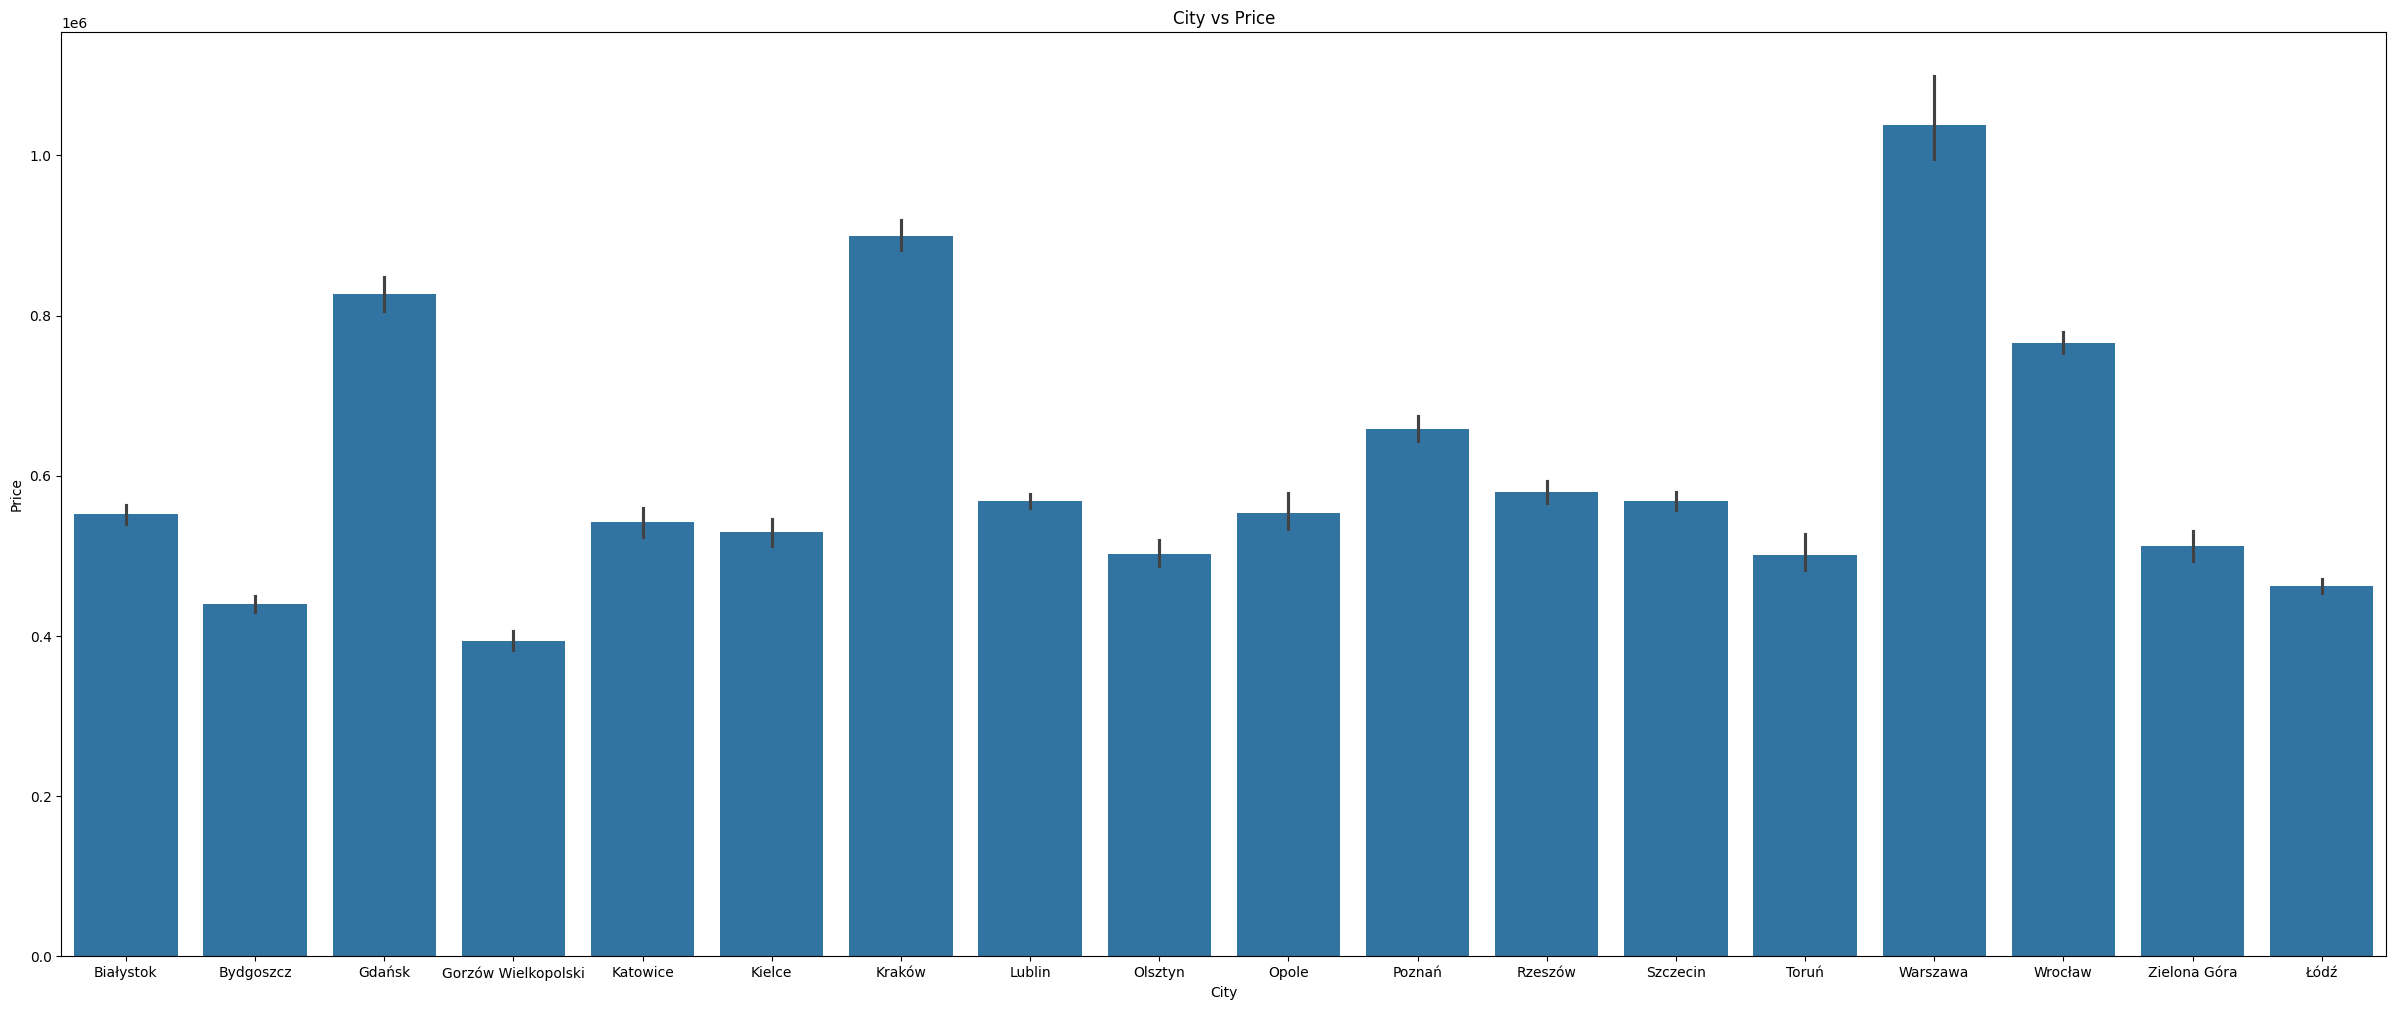

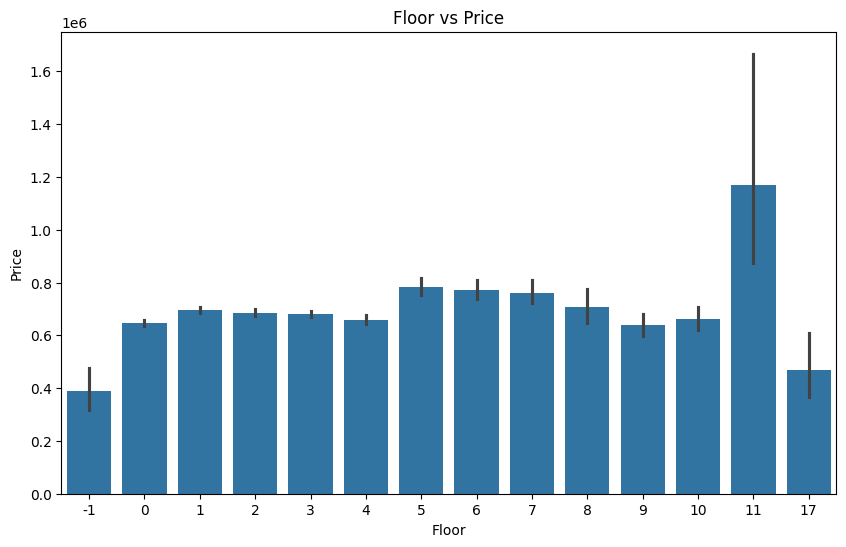

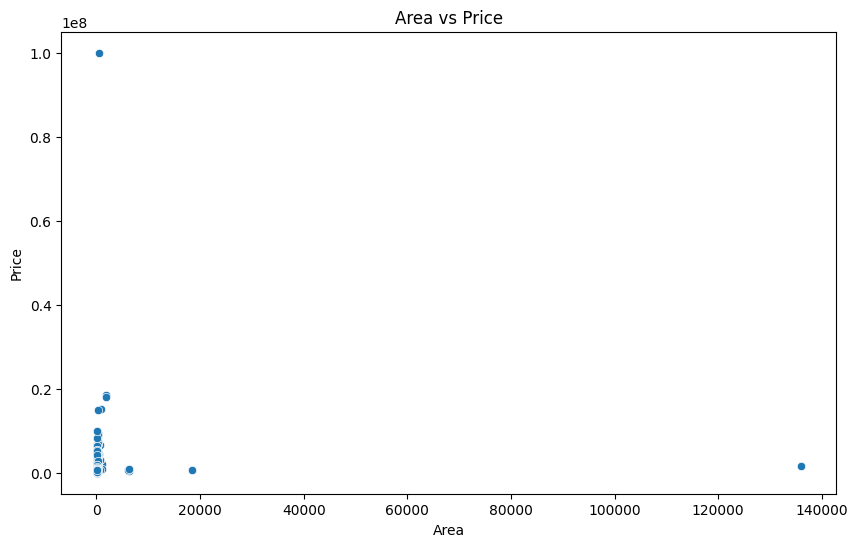

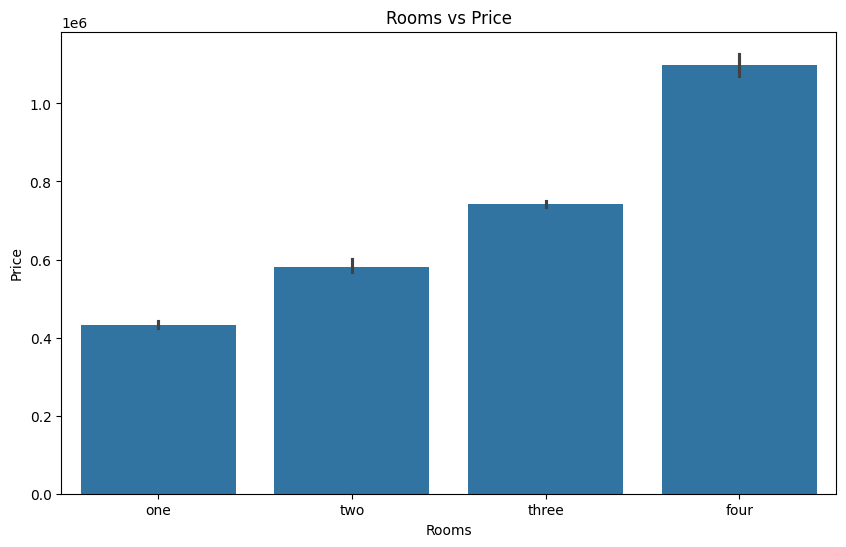

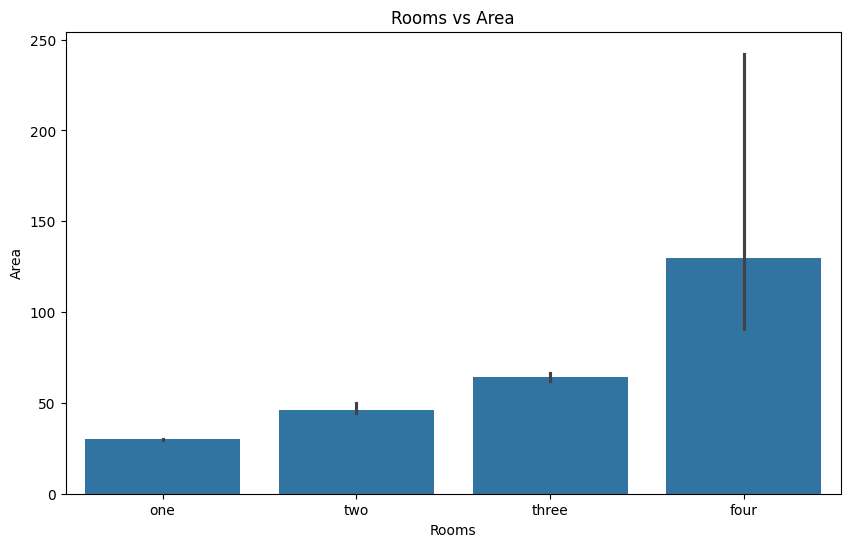

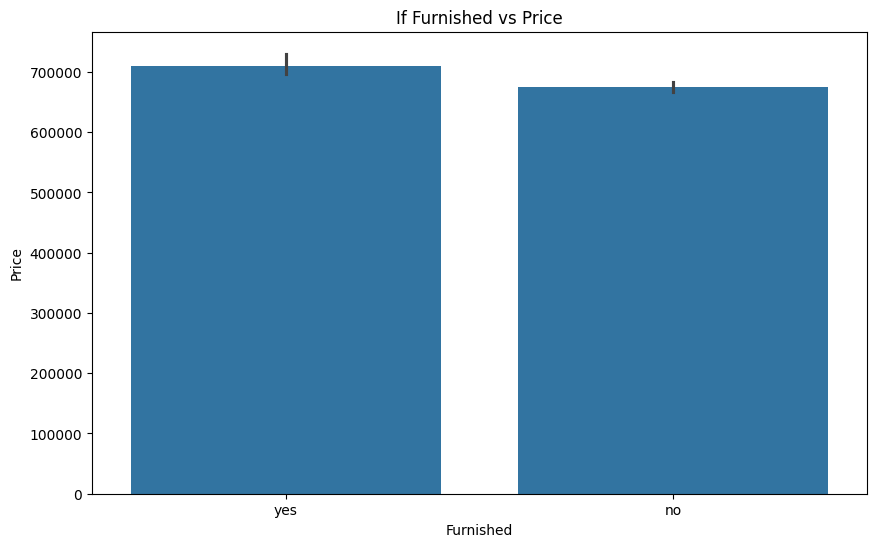

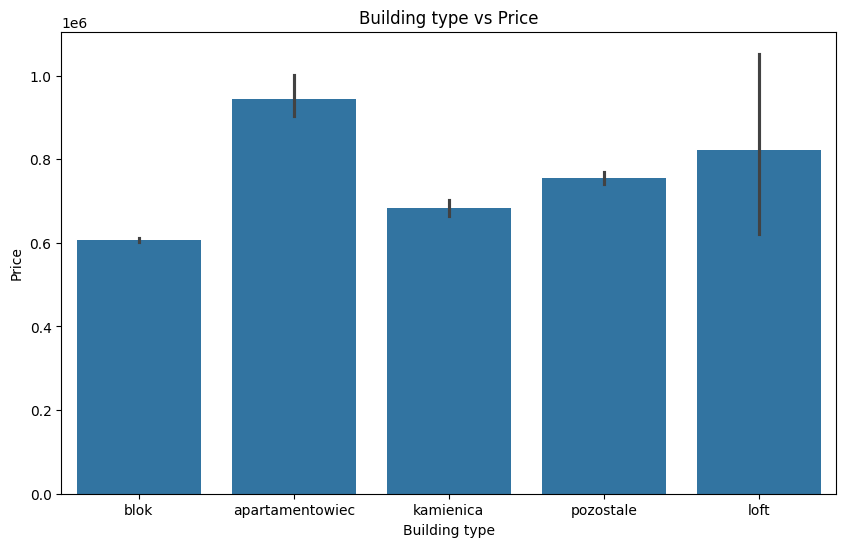

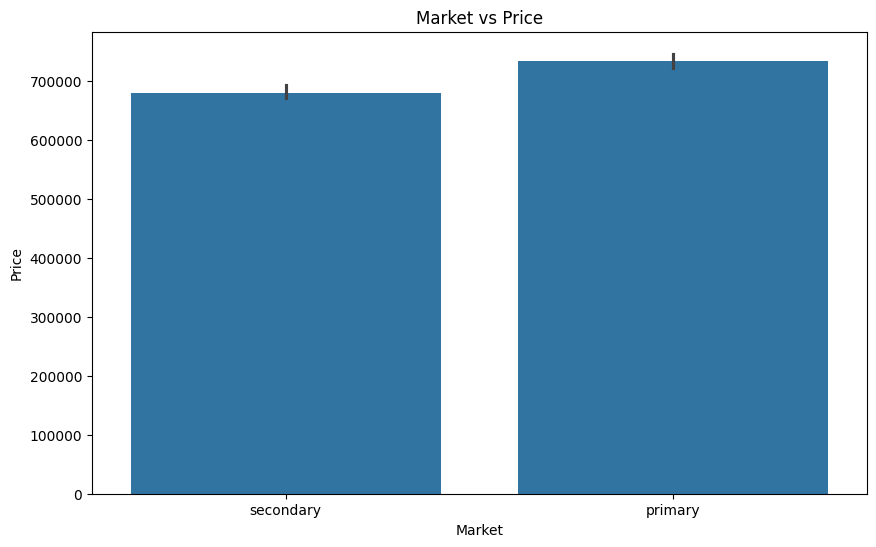

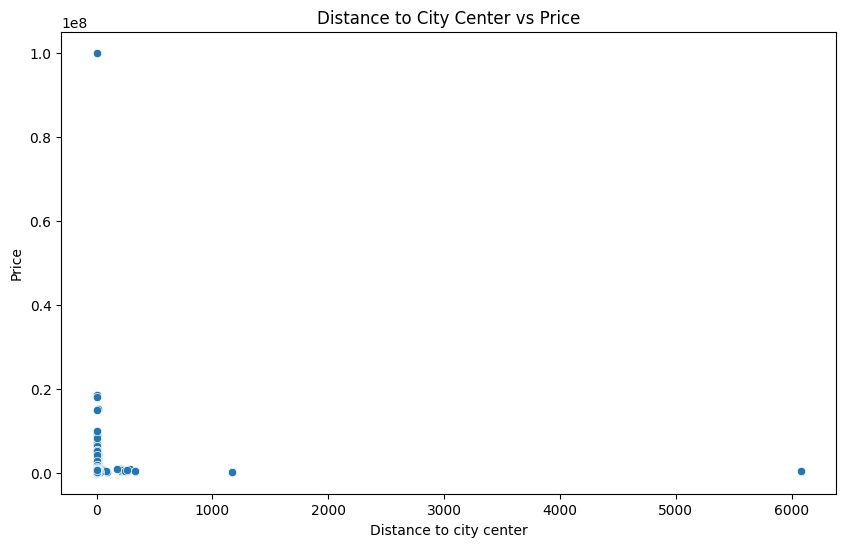

In [3]:
# Plotting

from project.plots.room_price import generate_room_price_plot
from project.plots.room_area import generate_room_area_plot
from project.plots.furnished_price import generate_furnished_price_plot
from project.plots.building_price import generate_building_price_plot
from project.plots.market_price import generate_market_price_plot
from project.plots.city_price import generate_city_price_plot
from project.plots.floor_price import generate_floor_price_plot
from project.plots.area_price import generate_area_price_plot
from project.plots.city_center_price import generate_city_center_price_plot

df = preprocessor.preprocessed_data.copy()
df = preprocessor.decode_data(df)

sorted_cities = sorted(df['City'].unique())
sorted_floor = sorted(df['Floor'].unique().astype(int))
sorted_rooms = ['one', 'two', 'three', 'four']


# Plotting city and price
generate_city_price_plot(df, sorted_cities, path="C:\\Users\\chudz\\Desktop\\raport\\city_price_before_filtering.png")

# Plotting floor and price
generate_floor_price_plot(df, sorted_floor, path="C:\\Users\\chudz\\Desktop\\raport\\floor_price_before_filtering.png")

# Plotting area and price
generate_area_price_plot(df, path="C:\\Users\\chudz\\Desktop\\raport\\area_price_before_filtering.png")

# Plotting room number and price
generate_room_price_plot(df, sorted_rooms, path="C:\\Users\\chudz\\Desktop\\raport\\room_price_before_filtering.png")

# Plotting room number and area
generate_room_area_plot(df, sorted_rooms, path="C:\\Users\\chudz\\Desktop\\raport\\room_area_before_filtering.png")

# Plotting if_furnished and price
generate_furnished_price_plot(df, path="C:\\Users\\chudz\\Desktop\\raport\\furnished_price_before_filtering.png")

# Plotting building type and price
generate_building_price_plot(df, path="C:\\Users\\chudz\\Desktop\\raport\\building_price_before_filtering.png")

# Plotting market and price
generate_market_price_plot(df, path="C:\\Users\\chudz\\Desktop\\raport\\market_price_before_filtering.png")

# Plotting distance and price
generate_city_center_price_plot(df, if_regression=False, path="C:\\Users\\chudz\\Desktop\\raport\\city_center_price_before_filtering.png")

## Cleaning data

In [7]:
from src.filter_data import filter_preprocessor
print(len(preprocessor.preprocessed_data))
filter_preprocessor(preprocessor)
print(len(preprocessor.preprocessed_data))




27330
27150


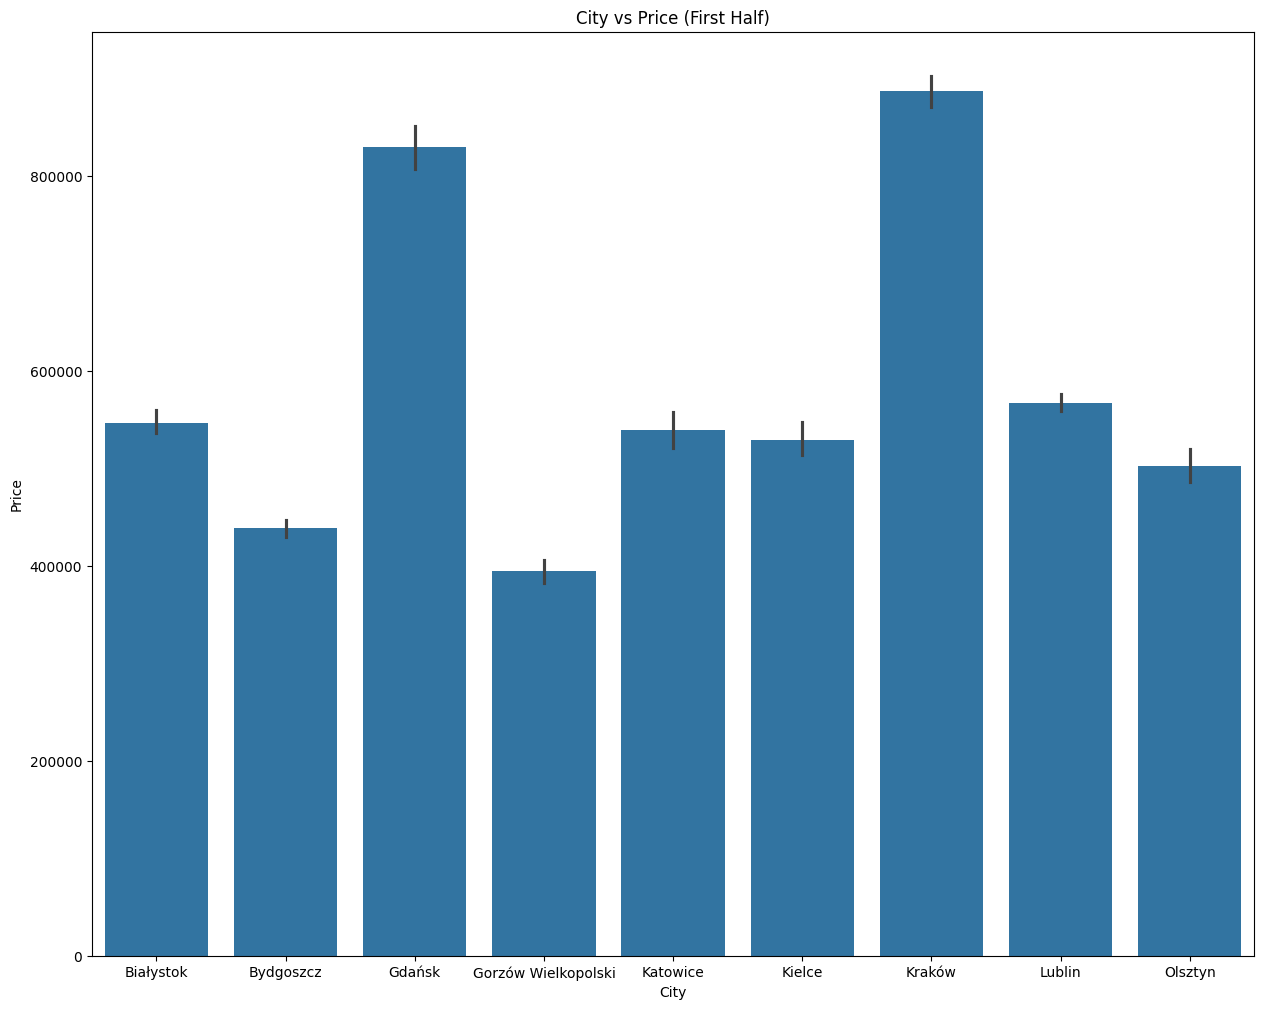

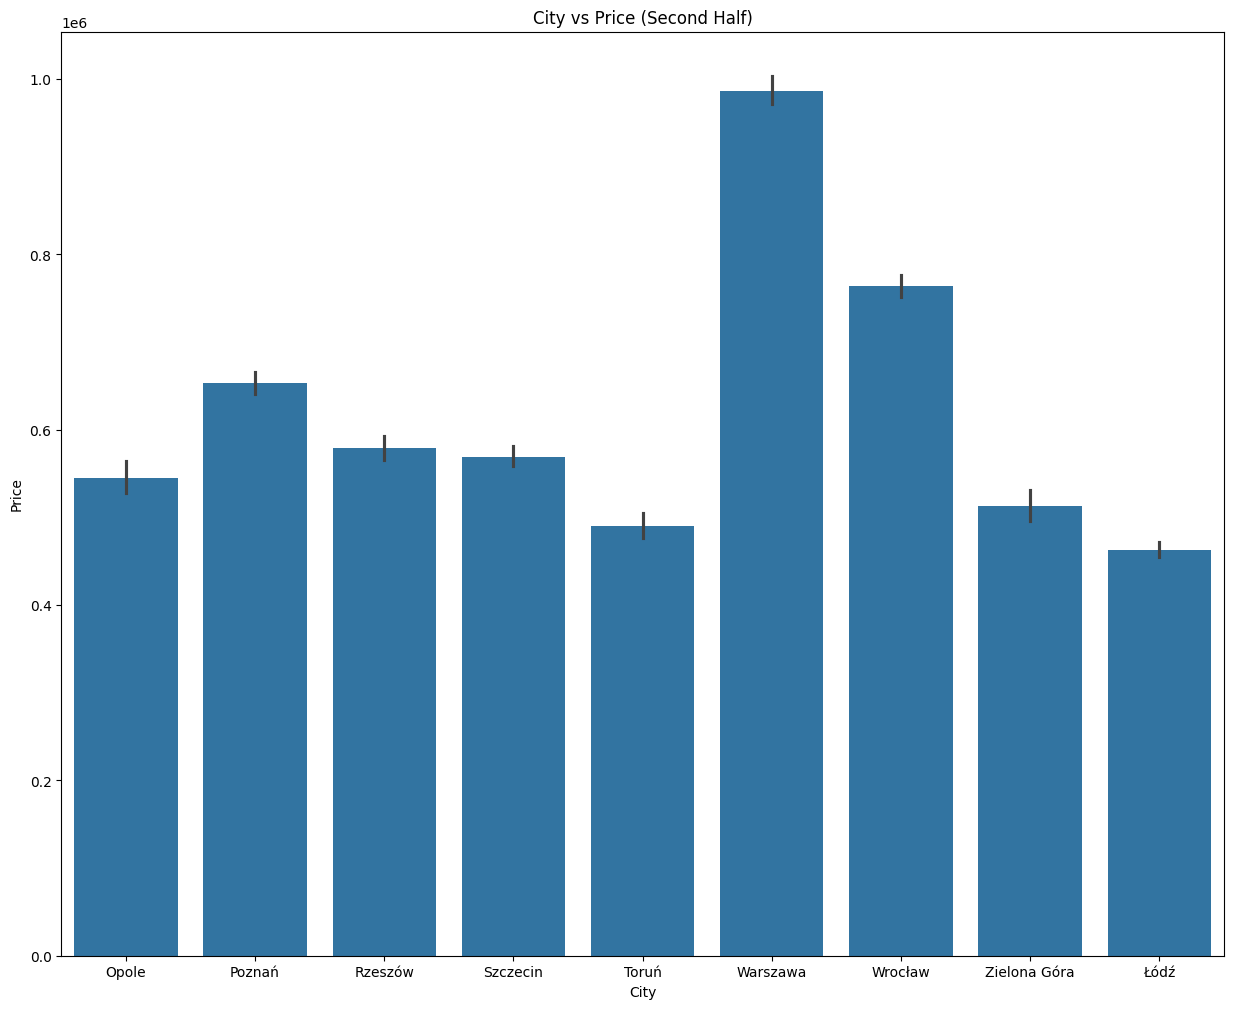

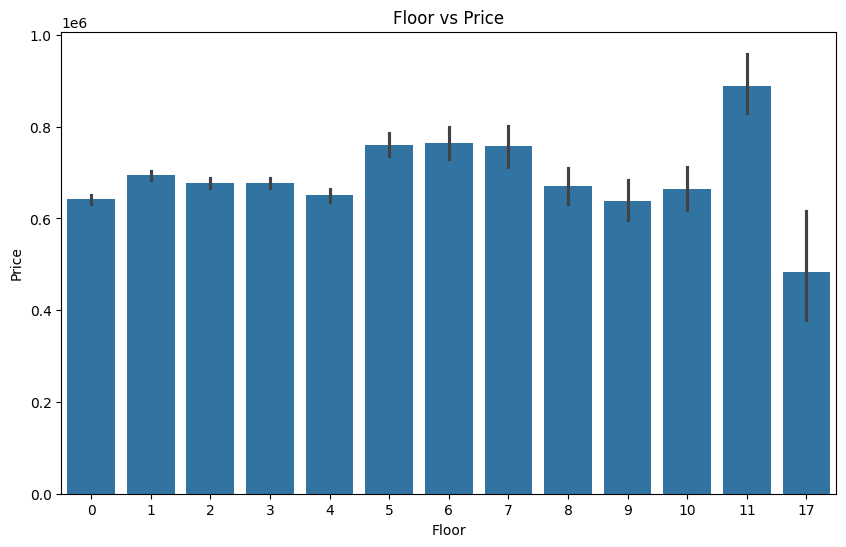

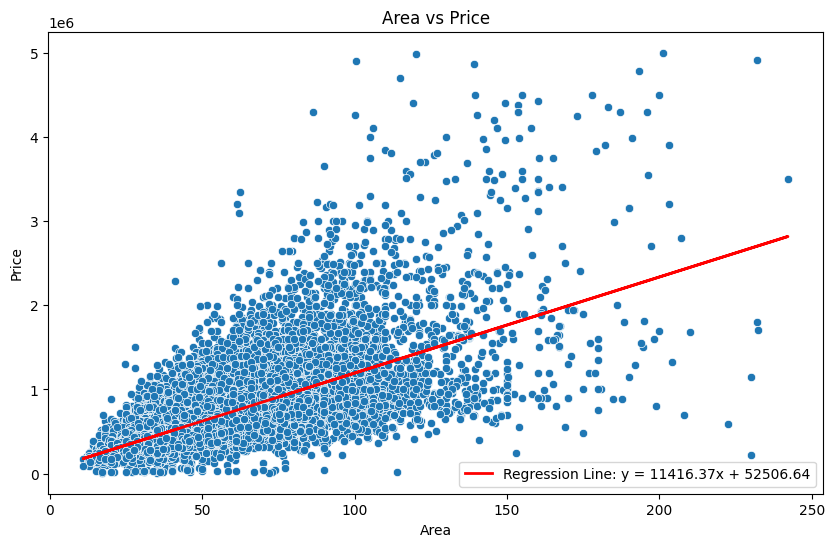

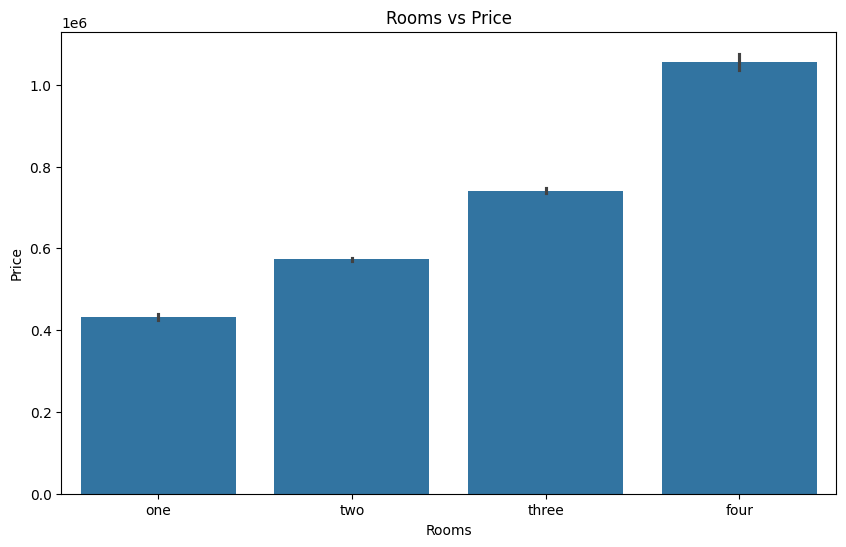

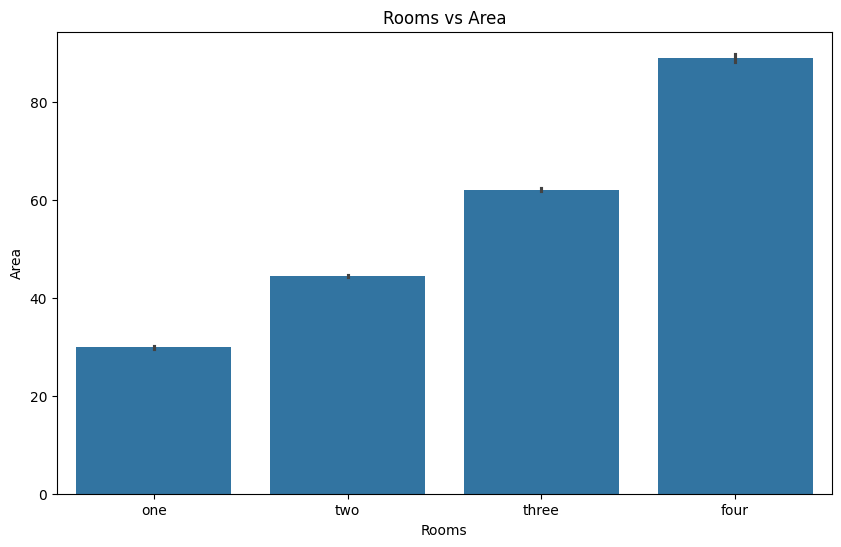

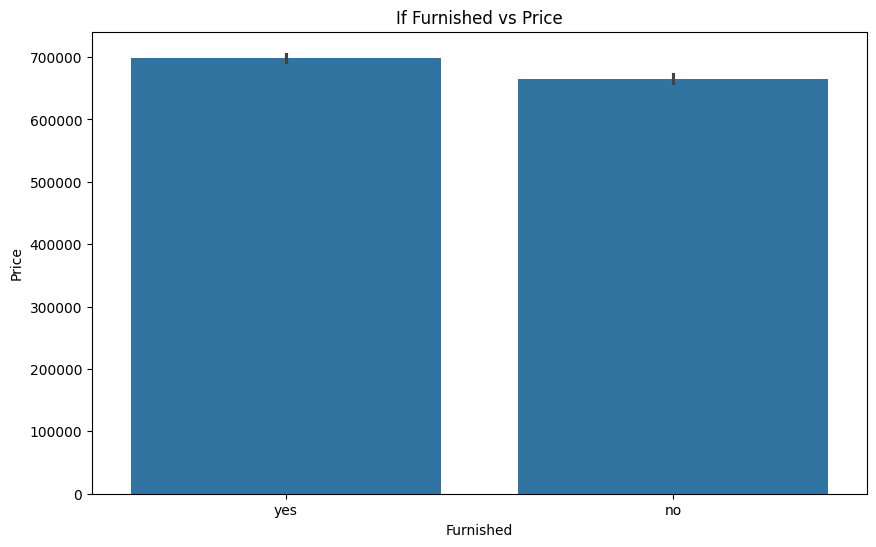

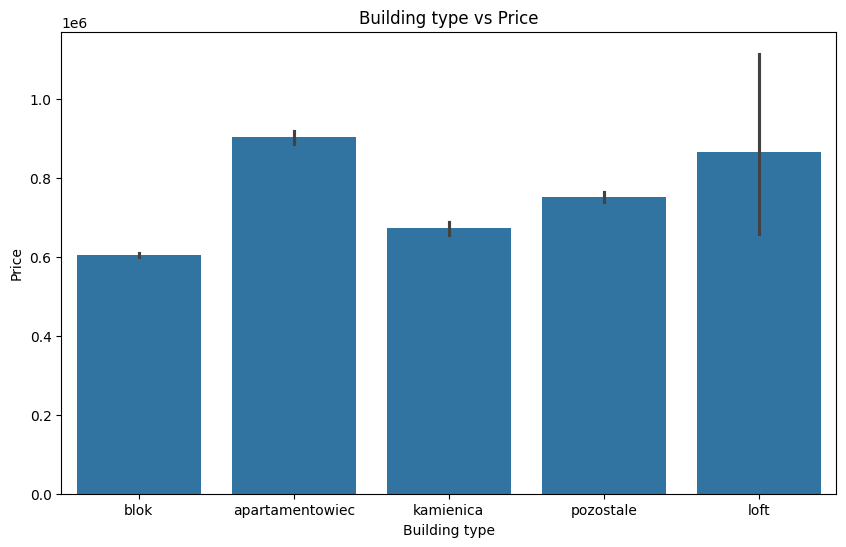

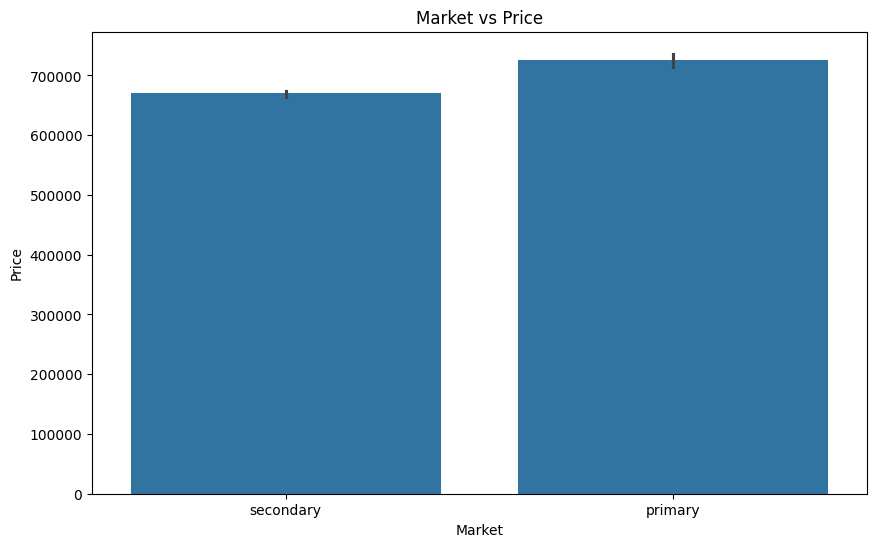

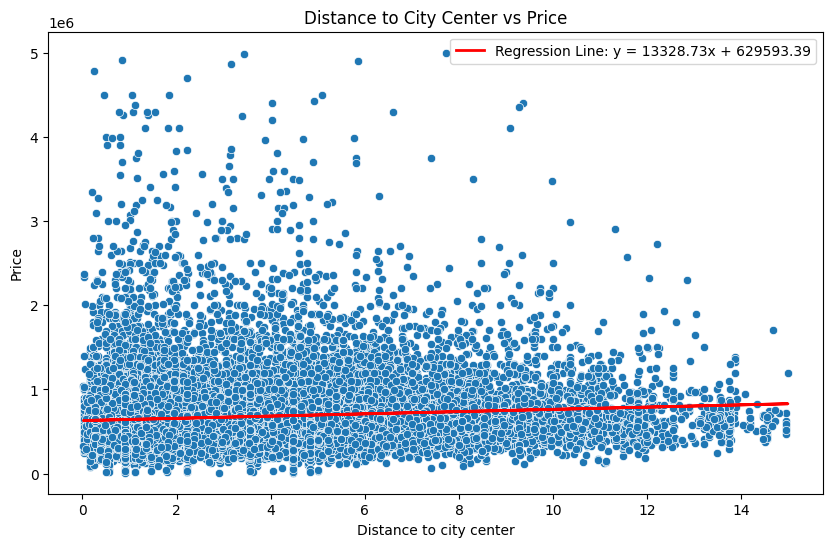

In [8]:
# Plotting

from project.plots.room_price import generate_room_price_plot
from project.plots.room_area import generate_room_area_plot
from project.plots.furnished_price import generate_furnished_price_plot
from project.plots.building_price import generate_building_price_plot
from project.plots.market_price import generate_market_price_plot
from project.plots.city_price import generate_city_price_plot
from project.plots.floor_price import generate_floor_price_plot
from project.plots.area_price import generate_area_price_plot
from project.plots.city_center_price import generate_city_center_price_plot

df = preprocessor.preprocessed_data.copy()
df = preprocessor.decode_data(df)

sorted_cities = sorted(df['City'].unique())
sorted_floor = sorted(df['Floor'].unique().astype(int))
sorted_rooms = ['one', 'two', 'three', 'four']


# Plotting city and price
generate_city_price_plot(df, sorted_cities, path="C:\\Users\\chudz\\Desktop\\raport\\city_price_after_filtering.png")

# Plotting floor and price
generate_floor_price_plot(df, sorted_floor, path="C:\\Users\\chudz\\Desktop\\raport\\floor_price_after_filtering.png")

# Plotting area and price
generate_area_price_plot(df,if_regression=True, path="C:\\Users\\chudz\\Desktop\\raport\\area_price_after_filtering.png")

# Plotting room number and price
generate_room_price_plot(df, sorted_rooms, path="C:\\Users\\chudz\\Desktop\\raport\\room_price_after_filtering.png")

# Plotting room number and area
generate_room_area_plot(df, sorted_rooms, path="C:\\Users\\chudz\\Desktop\\raport\\room_area_after_filtering.png")

# Plotting if_furnished and price
generate_furnished_price_plot(df, path="C:\\Users\\chudz\\Desktop\\raport\\furnished_price_after_filtering.png")

# Plotting building type and price
generate_building_price_plot(df, path="C:\\Users\\chudz\\Desktop\\raport\\building_price_after_filtering.png")

# Plotting market and price
generate_market_price_plot(df, path="C:\\Users\\chudz\\Desktop\\raport\\market_price_after_filtering.png")

# Plotting distance and price
generate_city_center_price_plot(df, if_regression=True, path="C:\\Users\\chudz\\Desktop\\raport\\city_center_price_after_filtering.png")

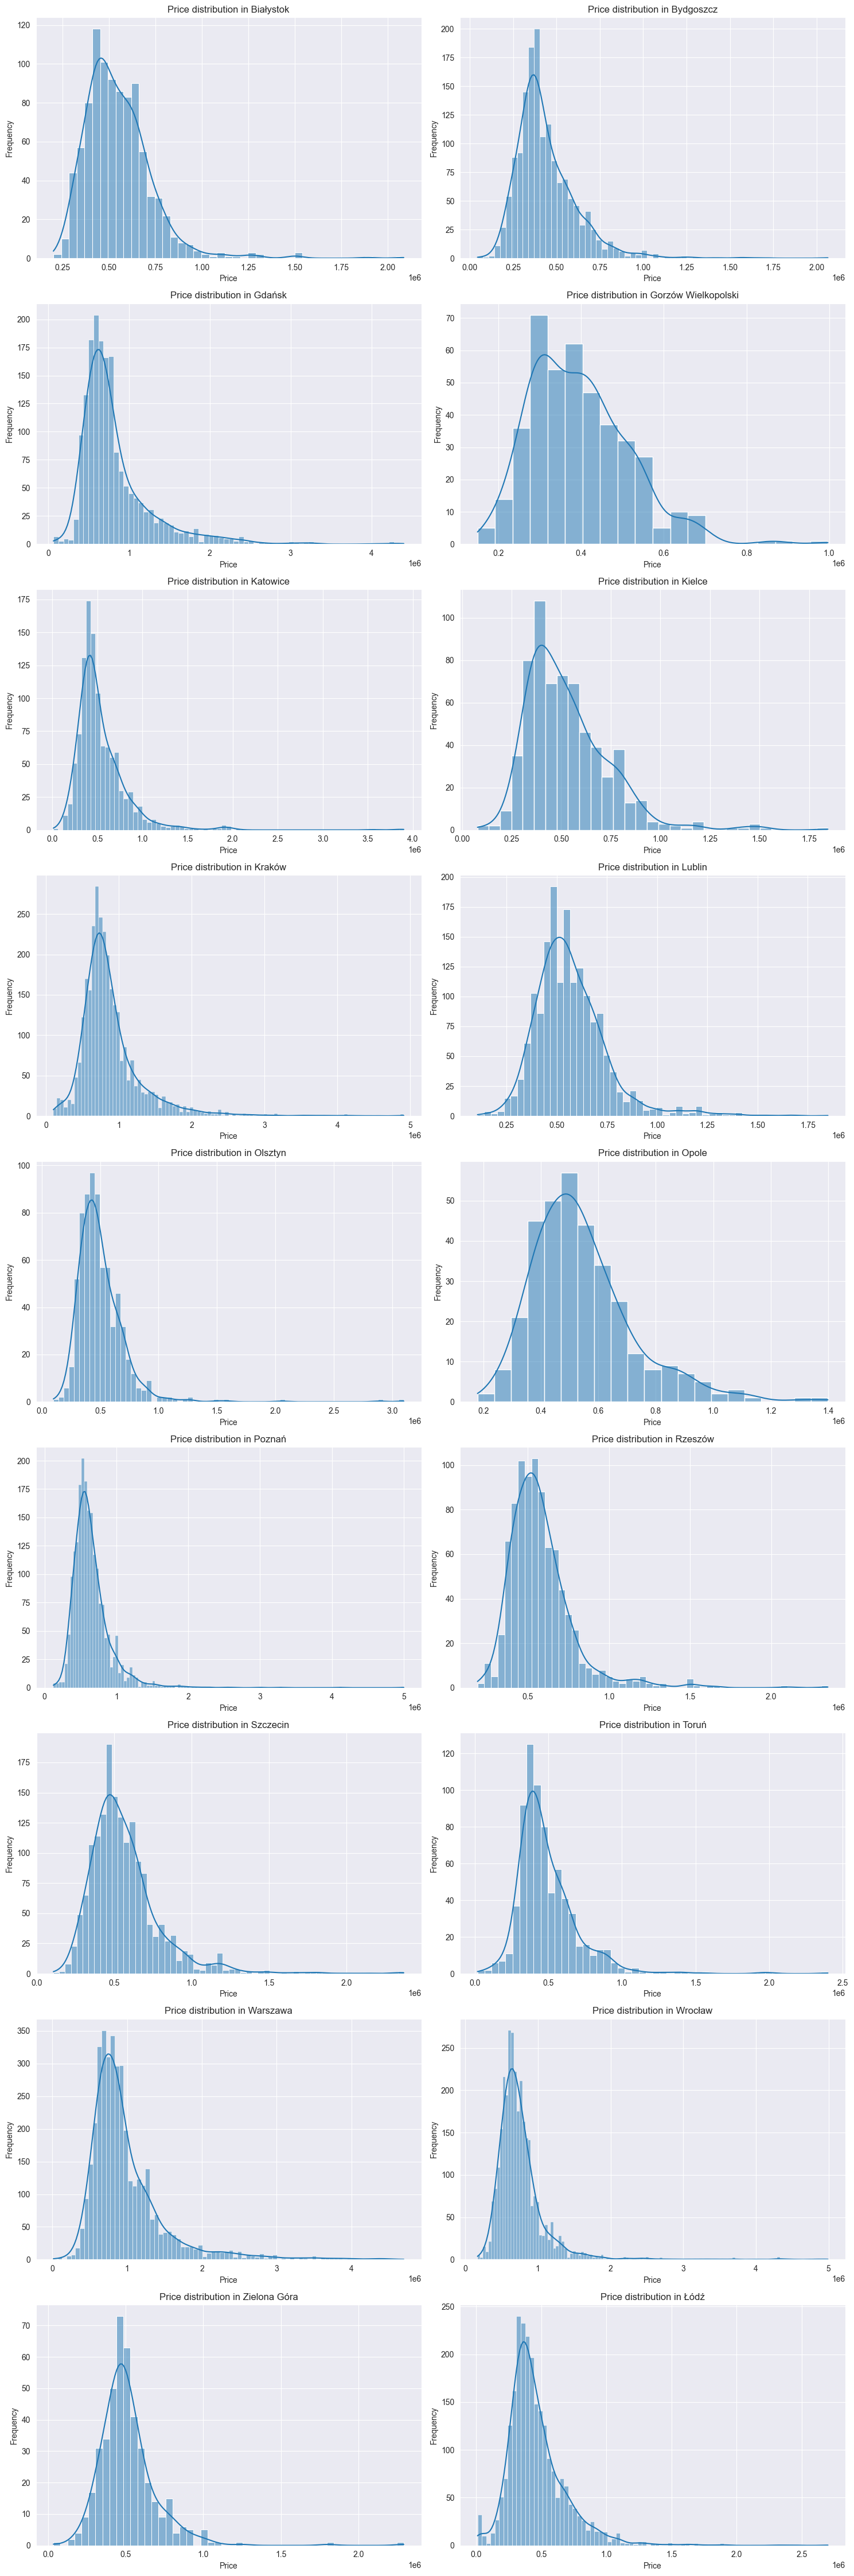

In [6]:
from project.plots.price_distribution_cities import generate_price_distribution_cities_plot
df = preprocessor.decode_data(preprocessor.preprocessed_data.copy())

generate_price_distribution_cities_plot(df, save_path="C:\\Users\\chudz\\Desktop\\raport")


27150
27150
Fitting 3 folds for each of 54 candidates, totalling 162 fits
Przewidywana cena mieszkania: 645377.56 PLN


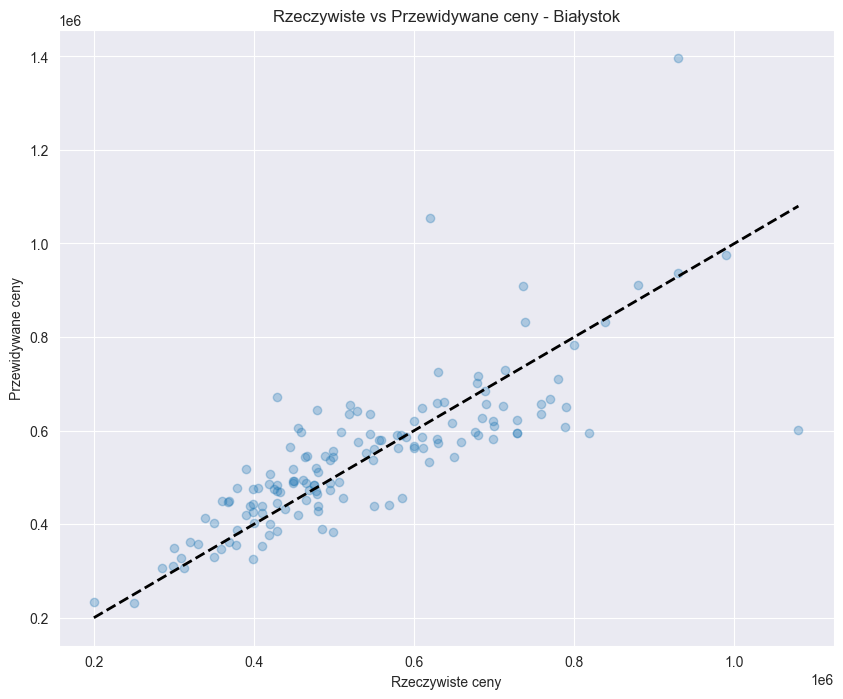

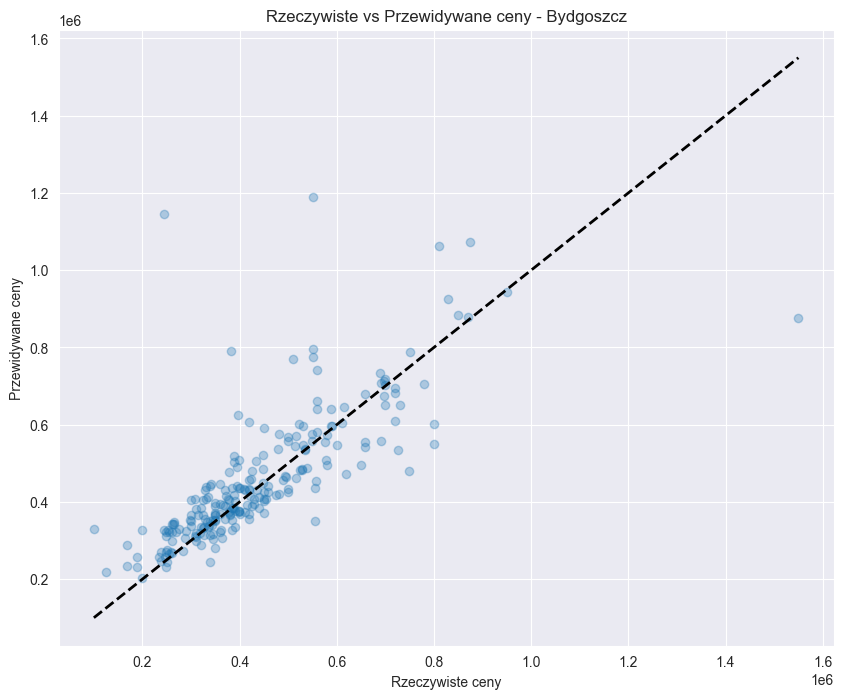

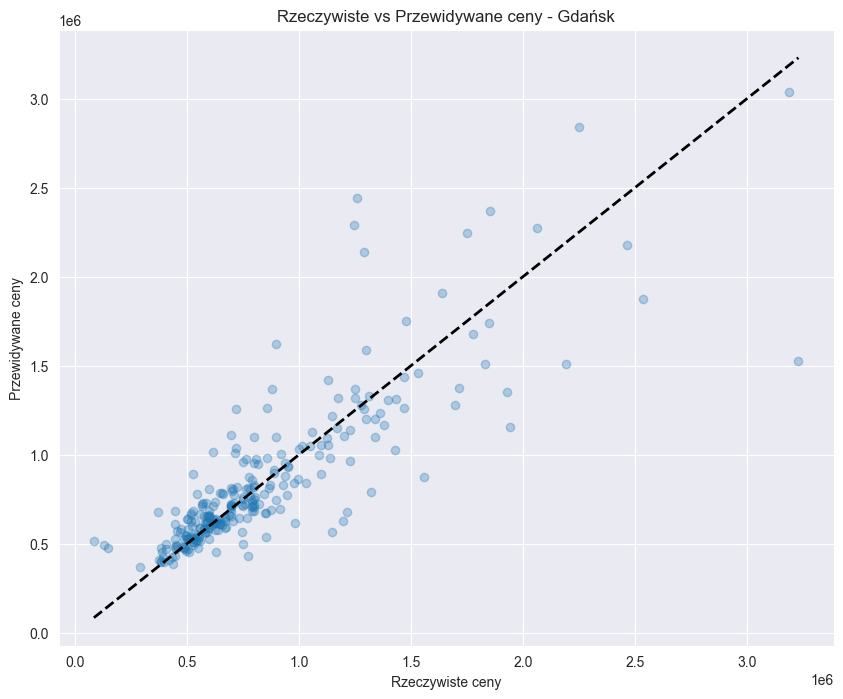

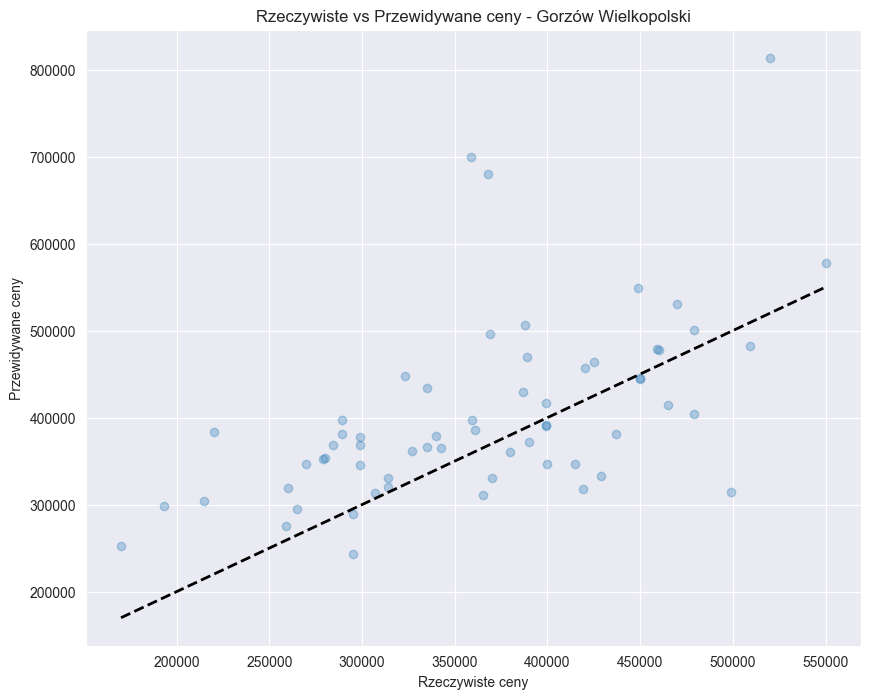

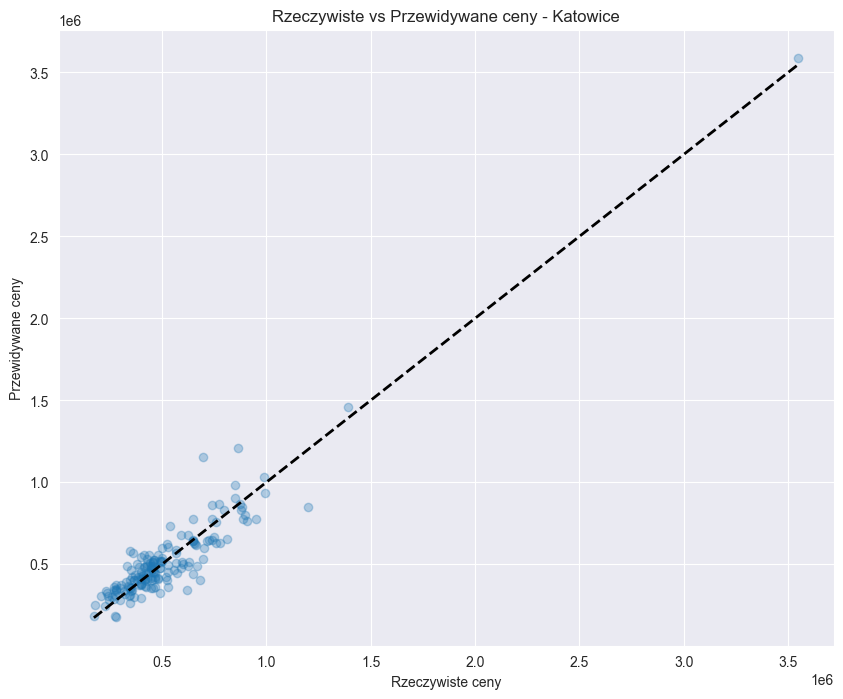

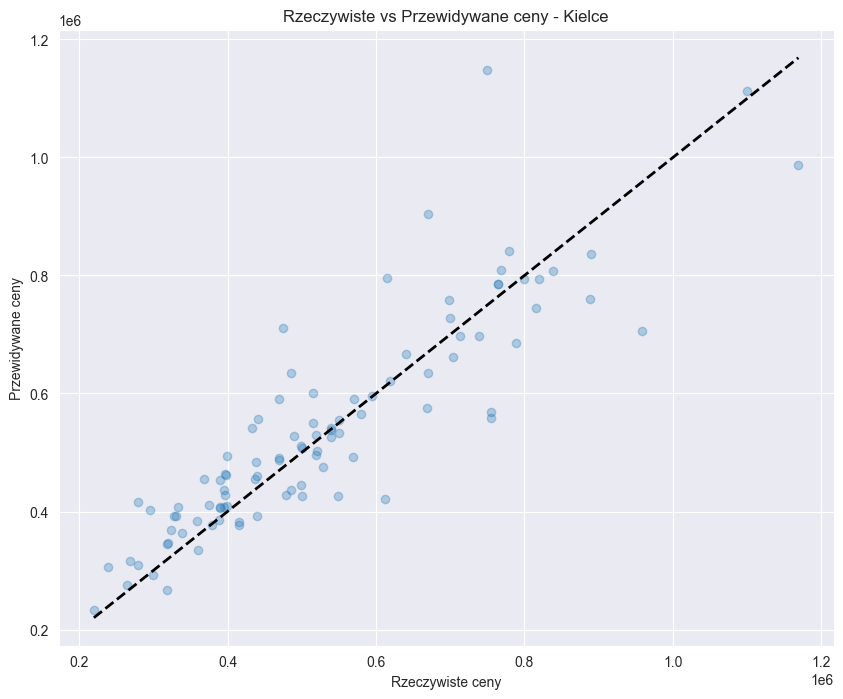

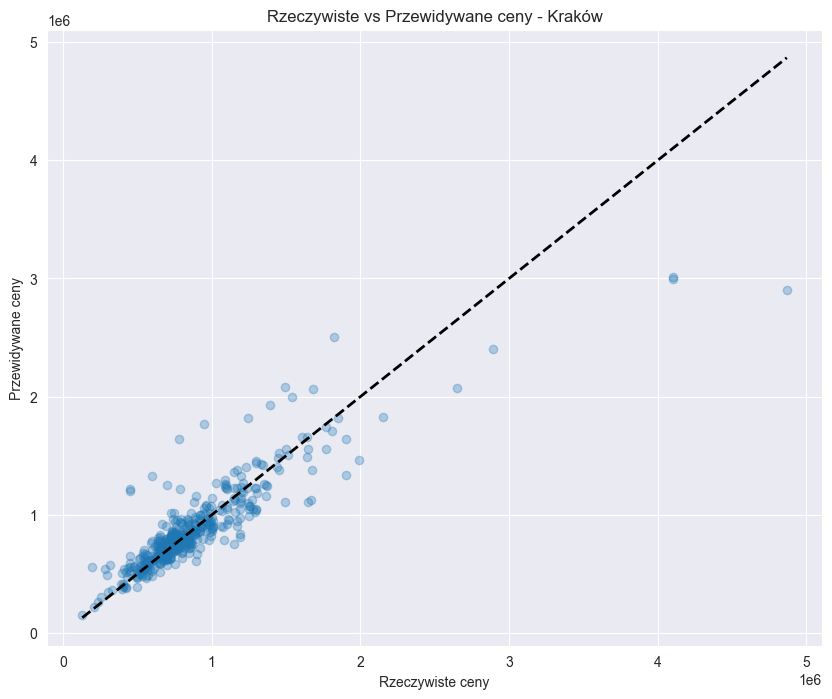

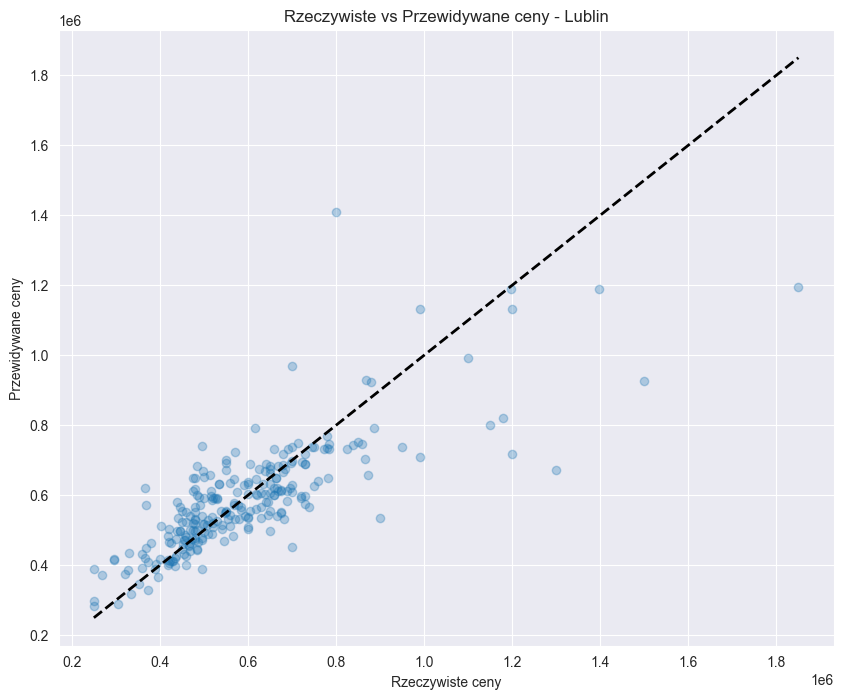

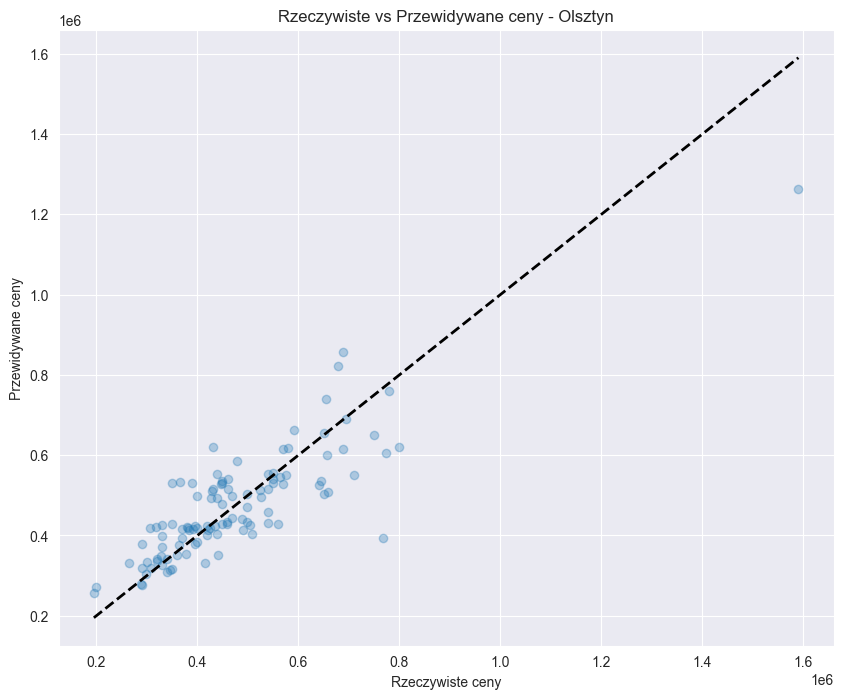

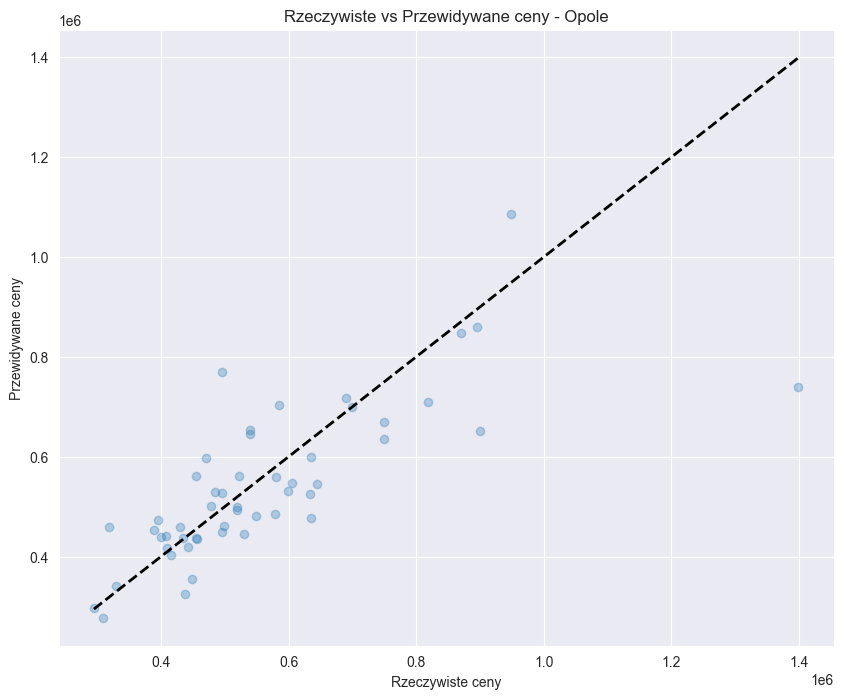

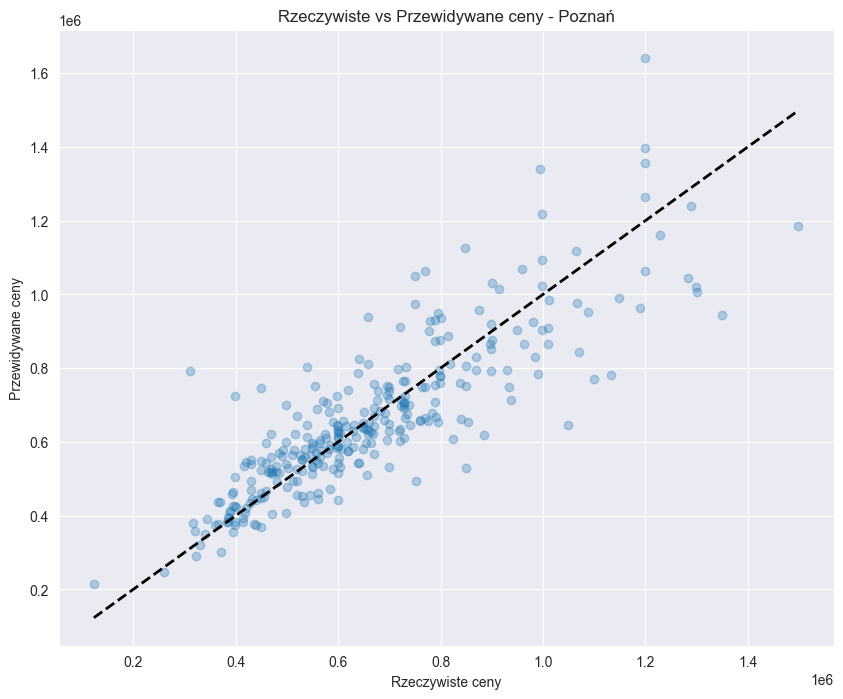

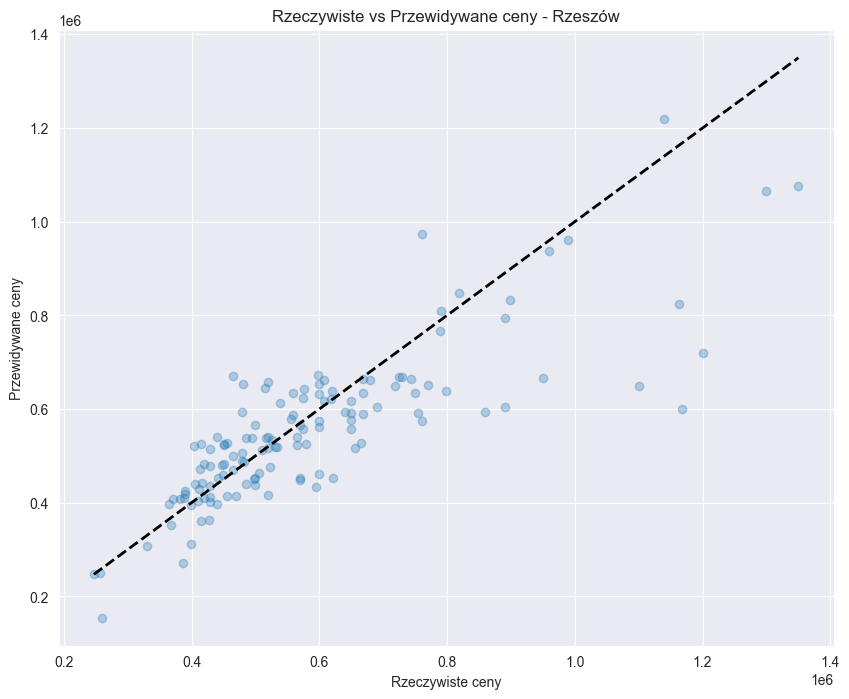

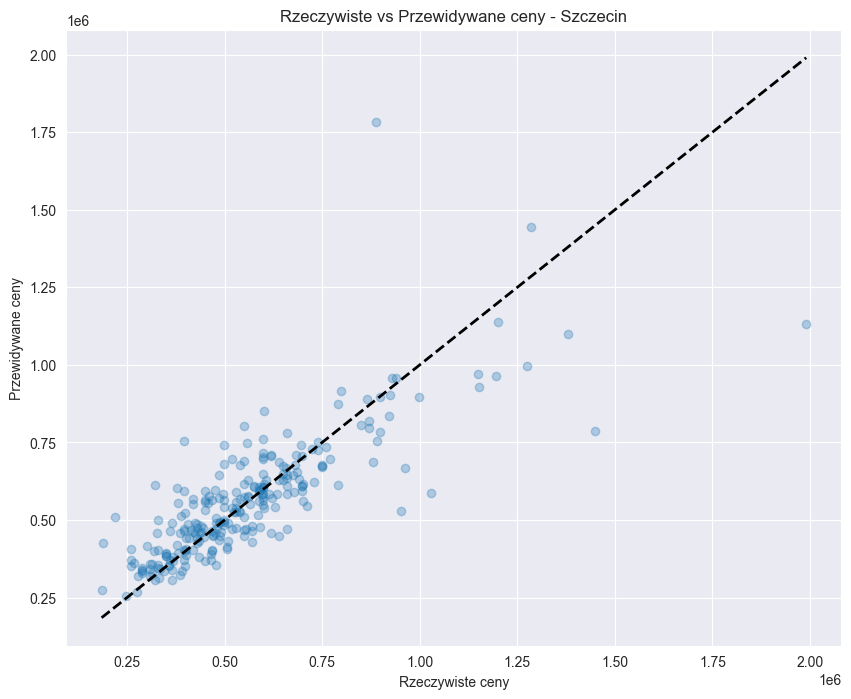

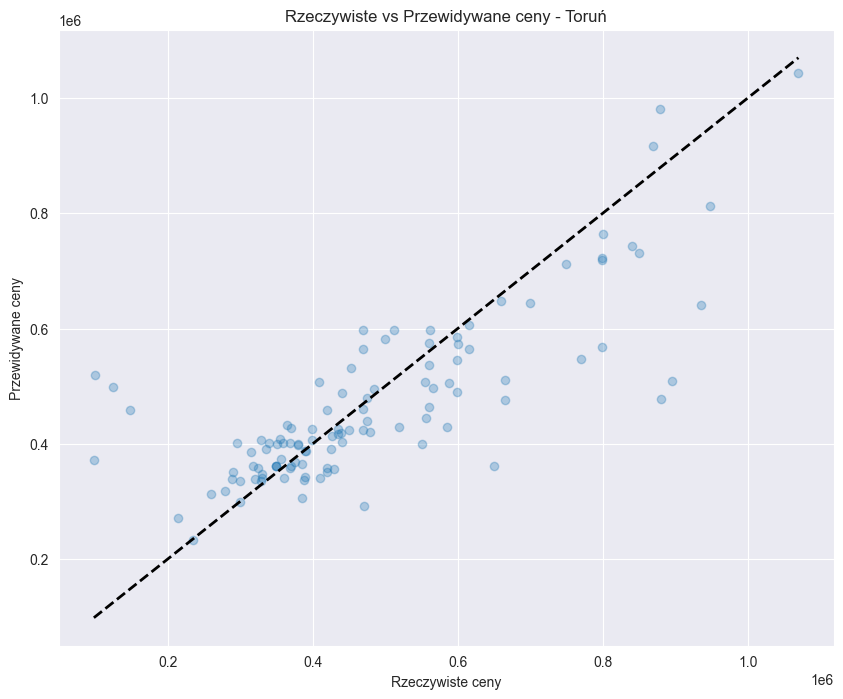

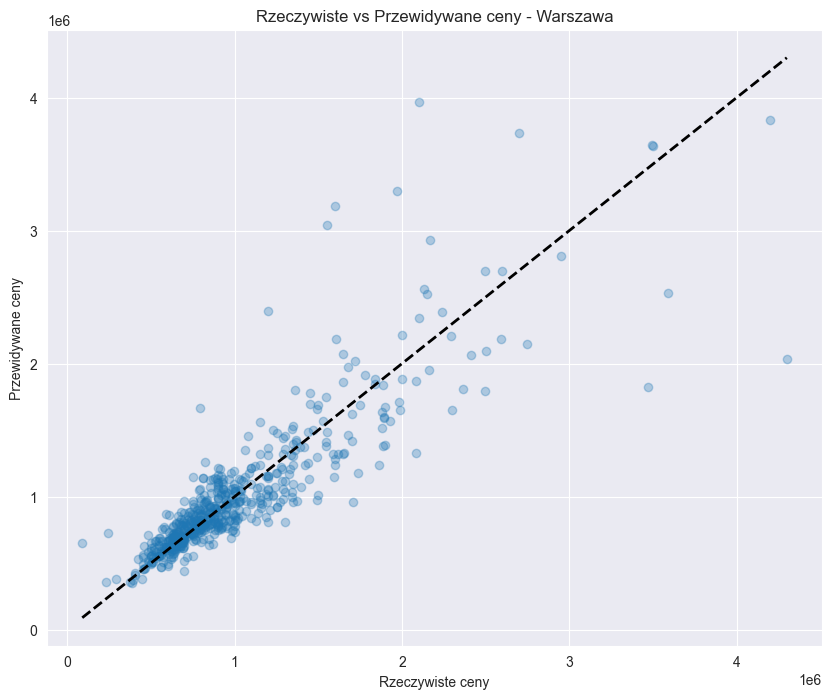

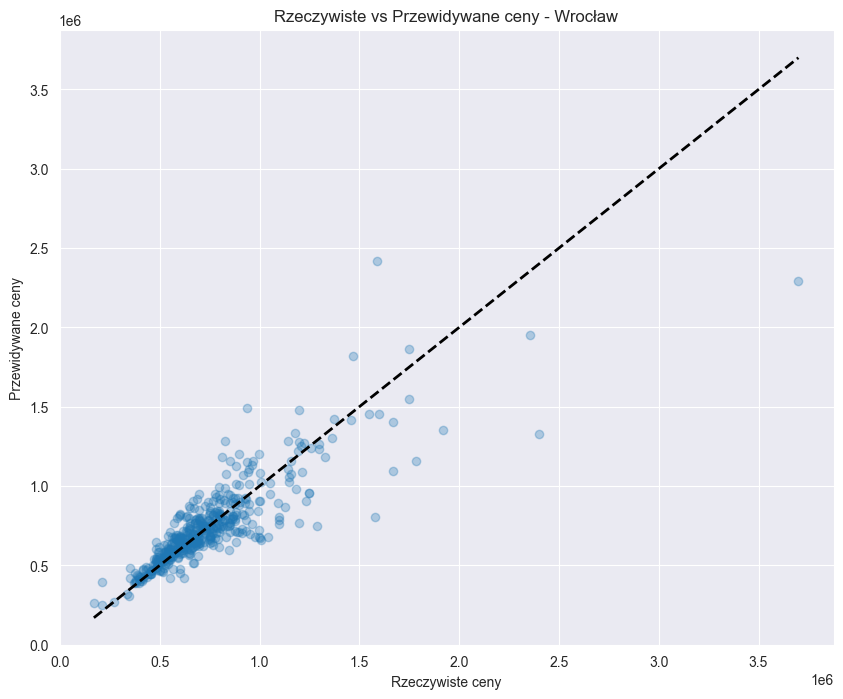

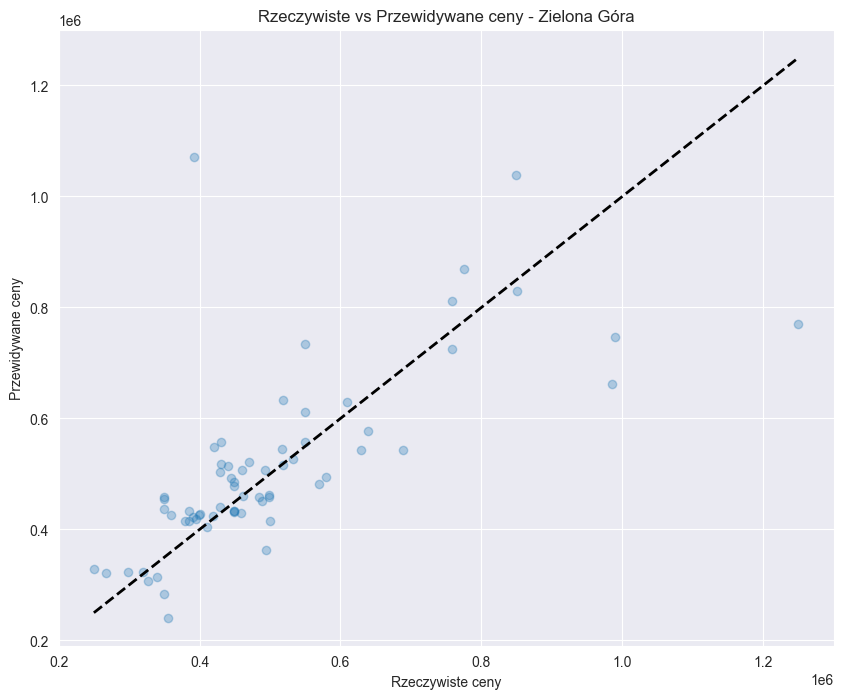

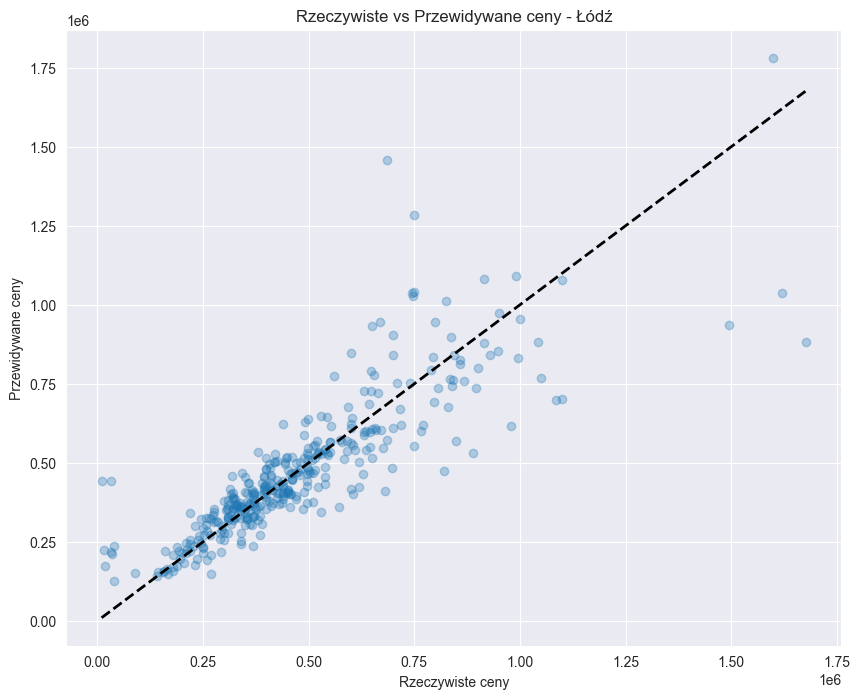

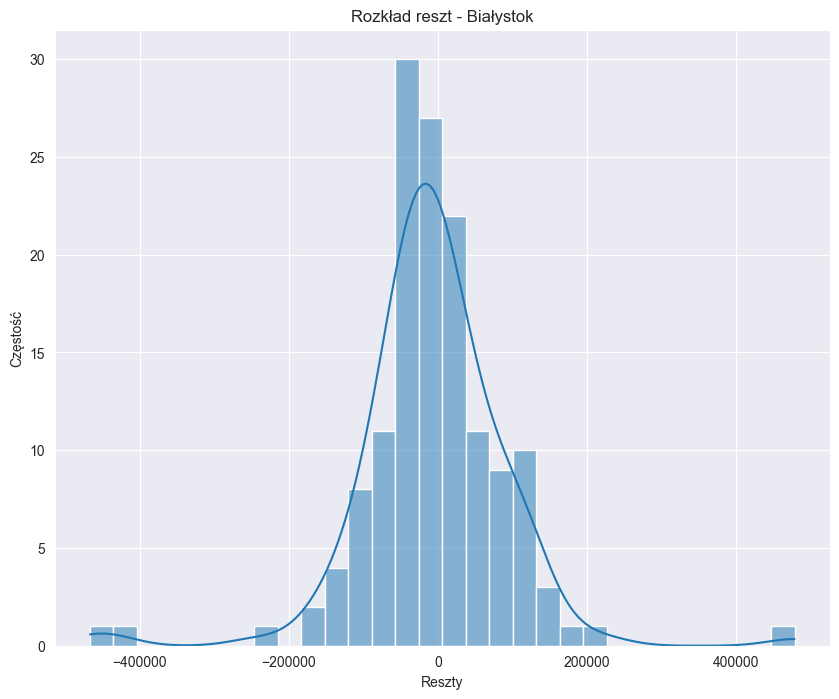

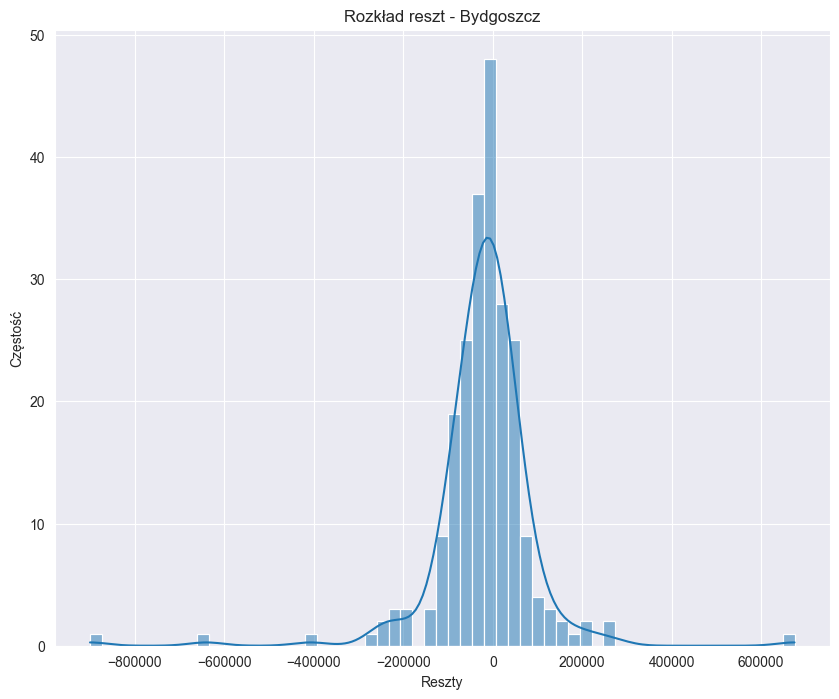

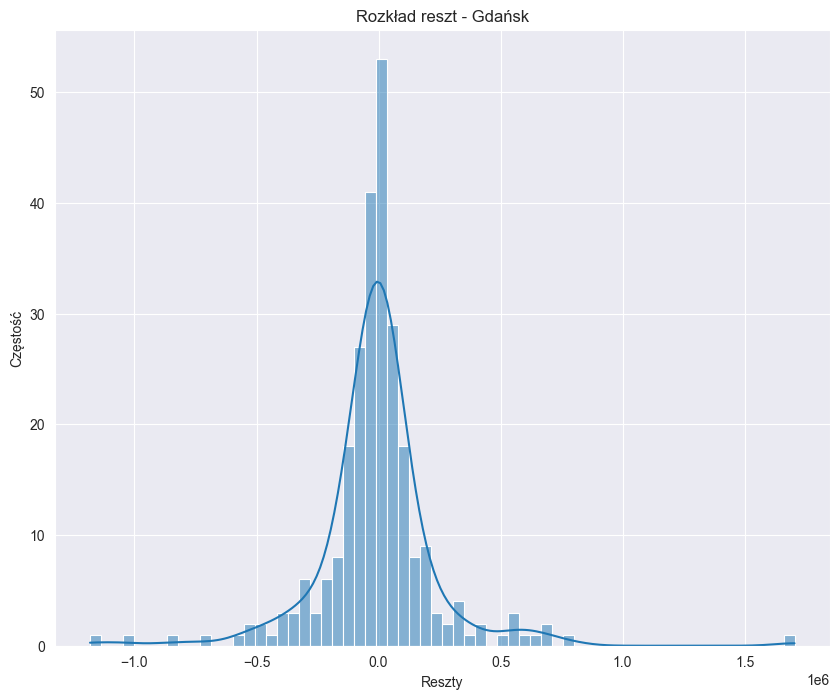

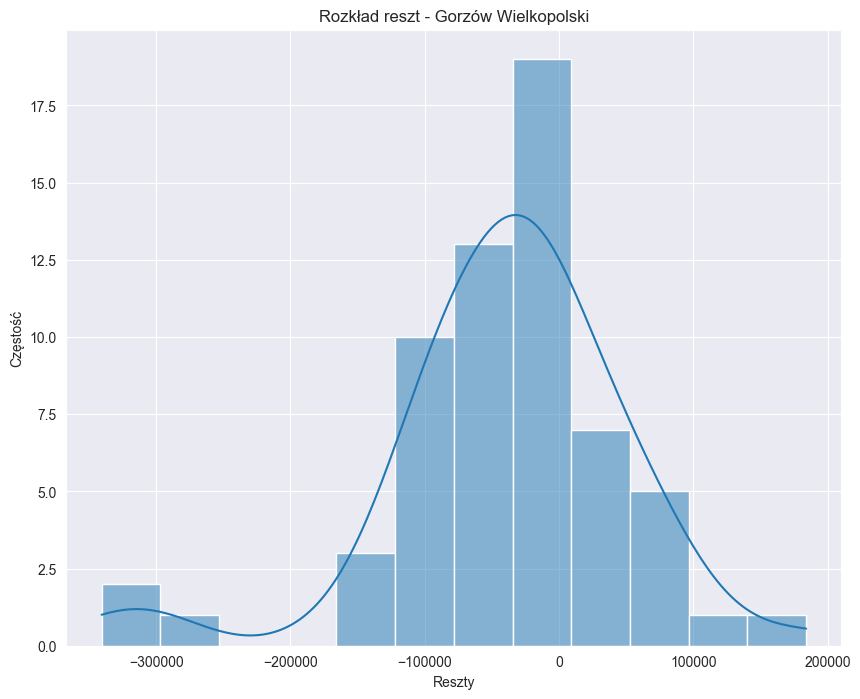

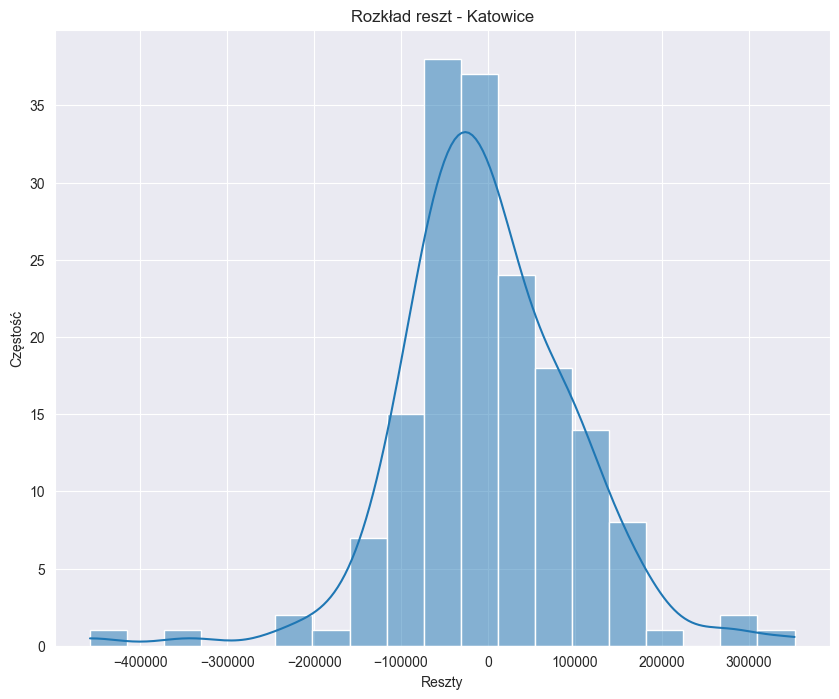

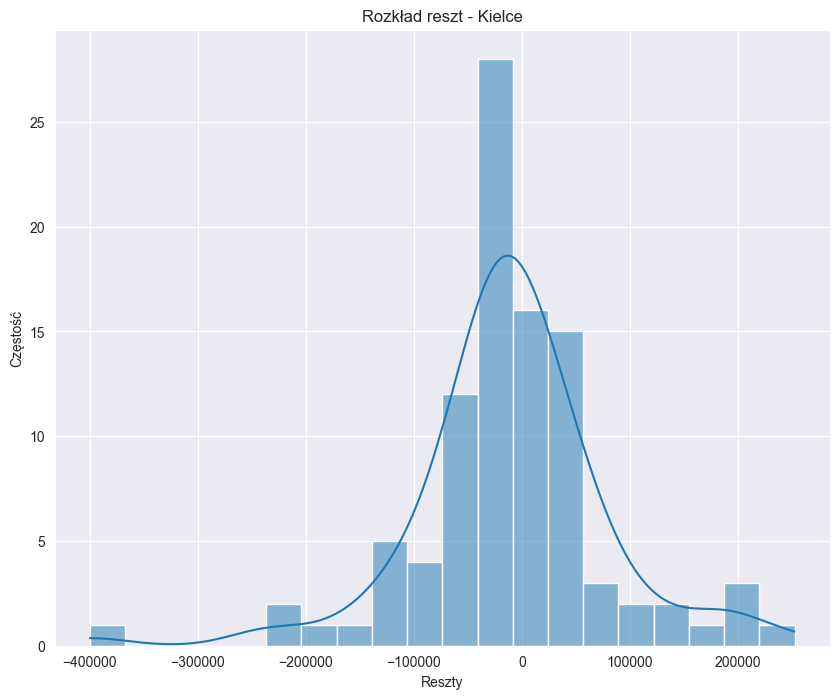

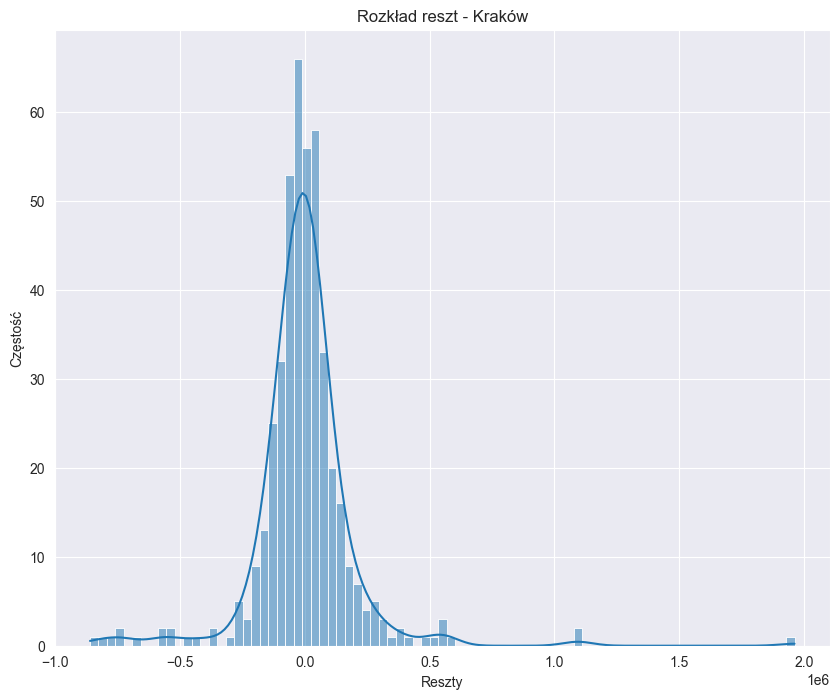

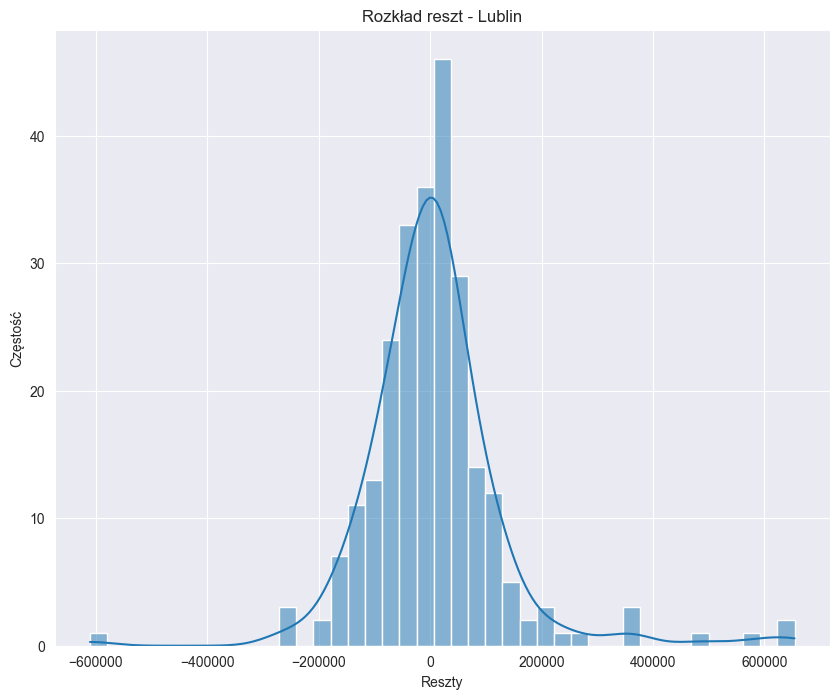

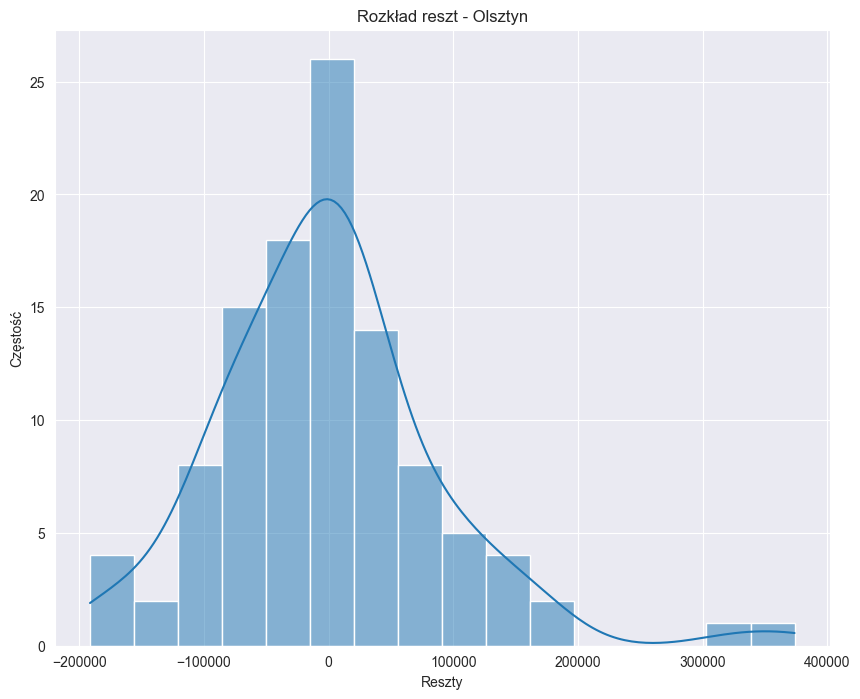

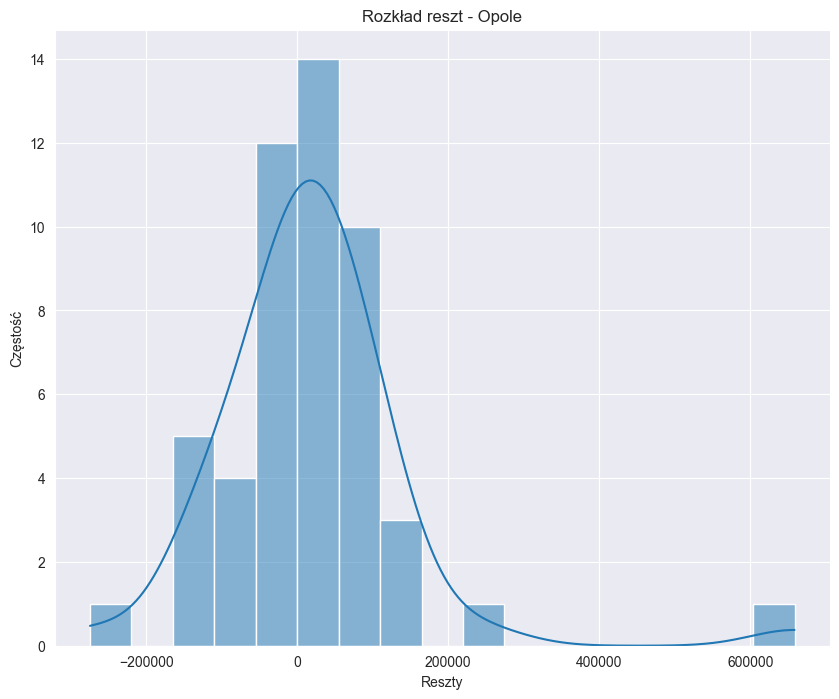

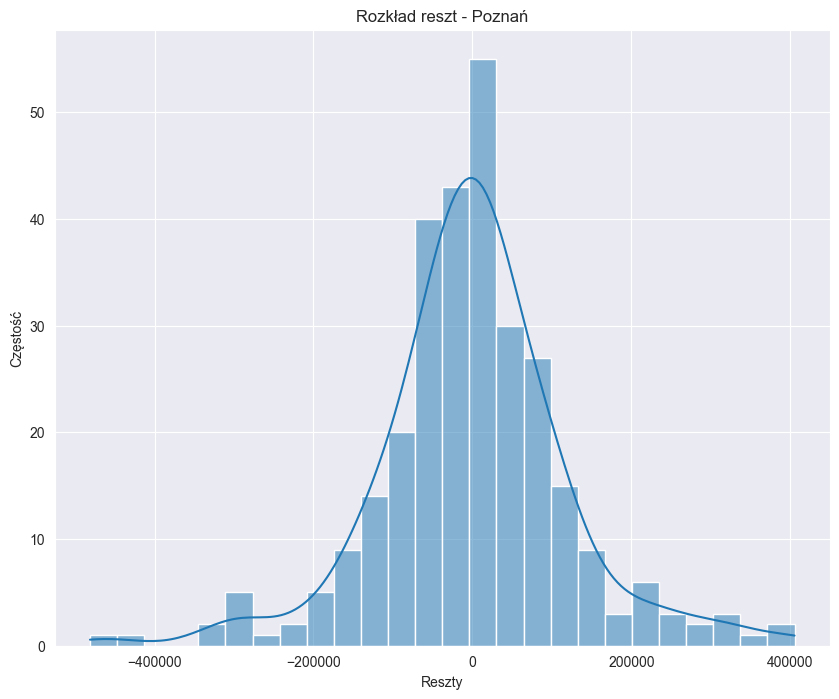

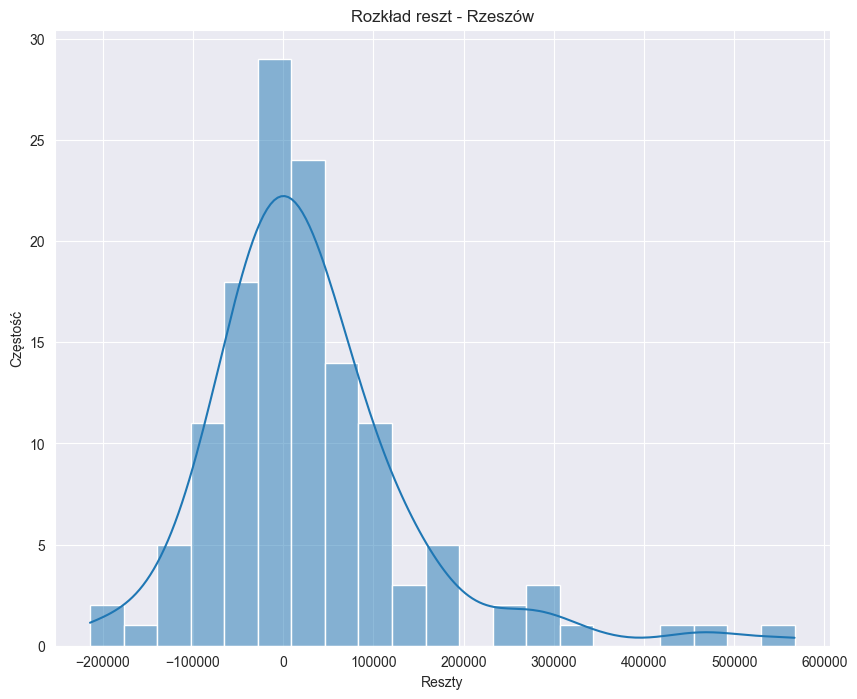

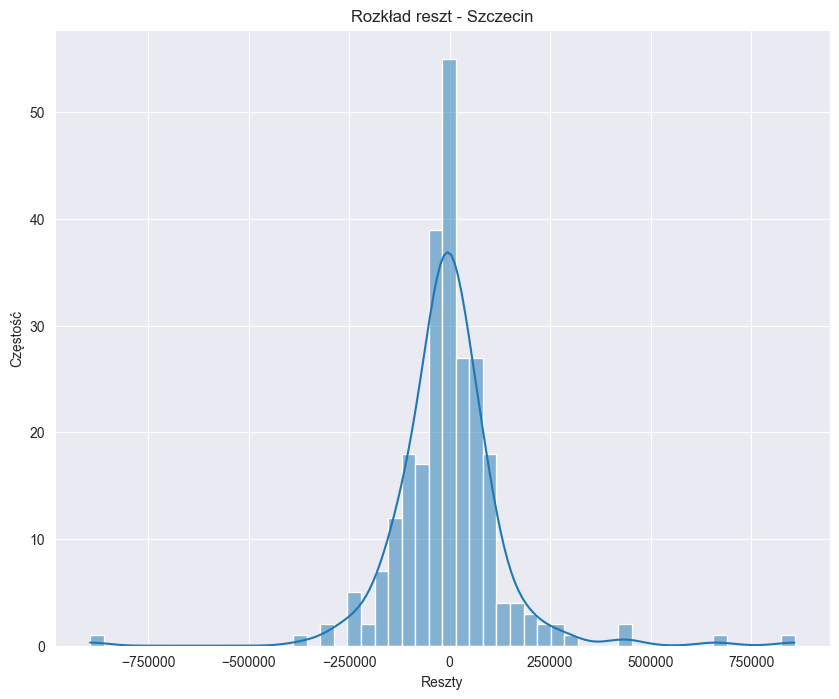

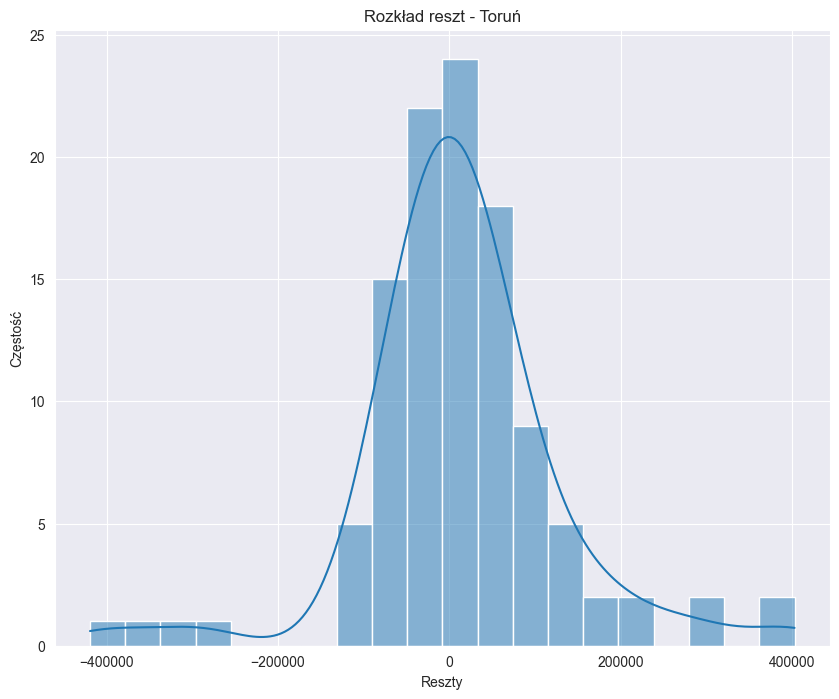

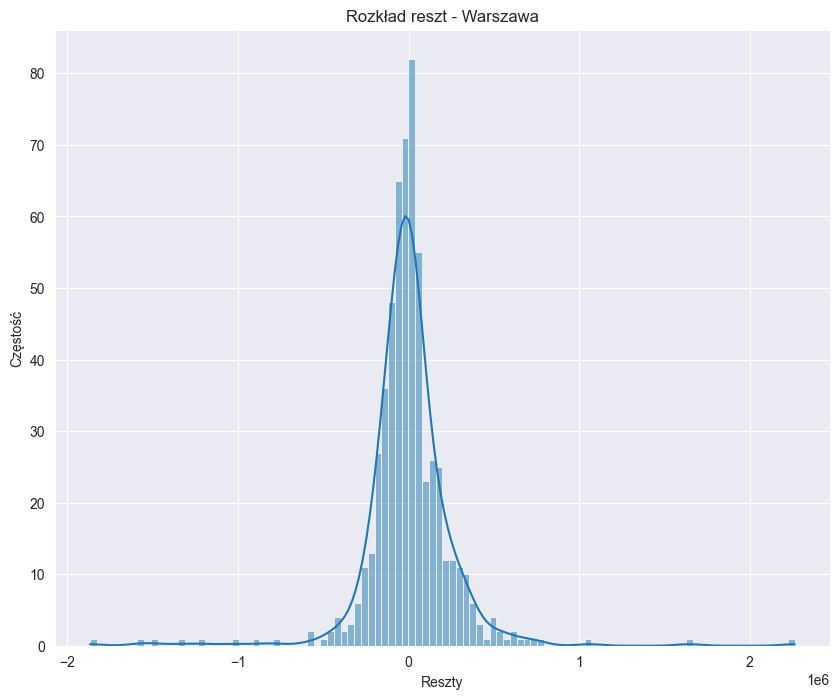

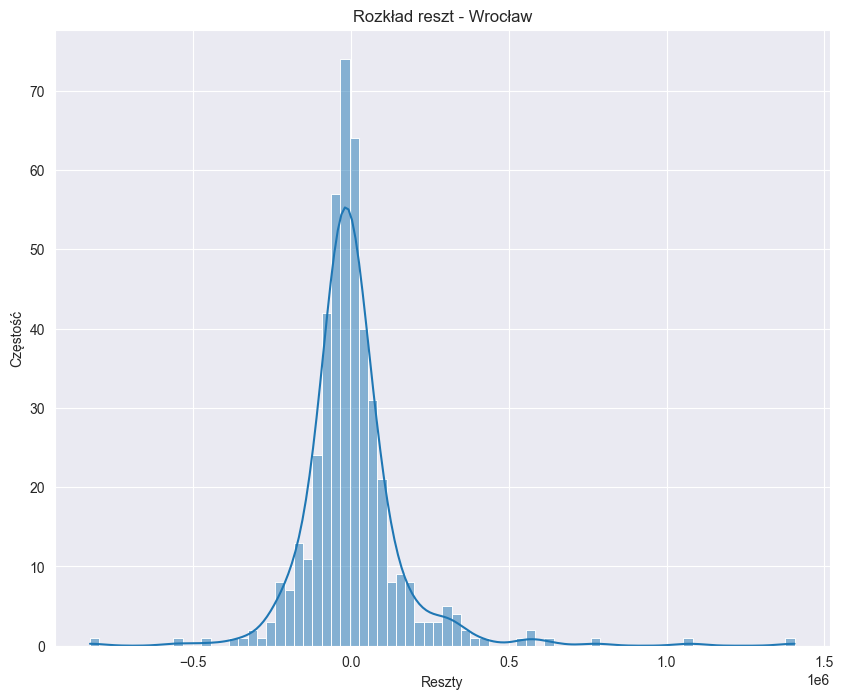

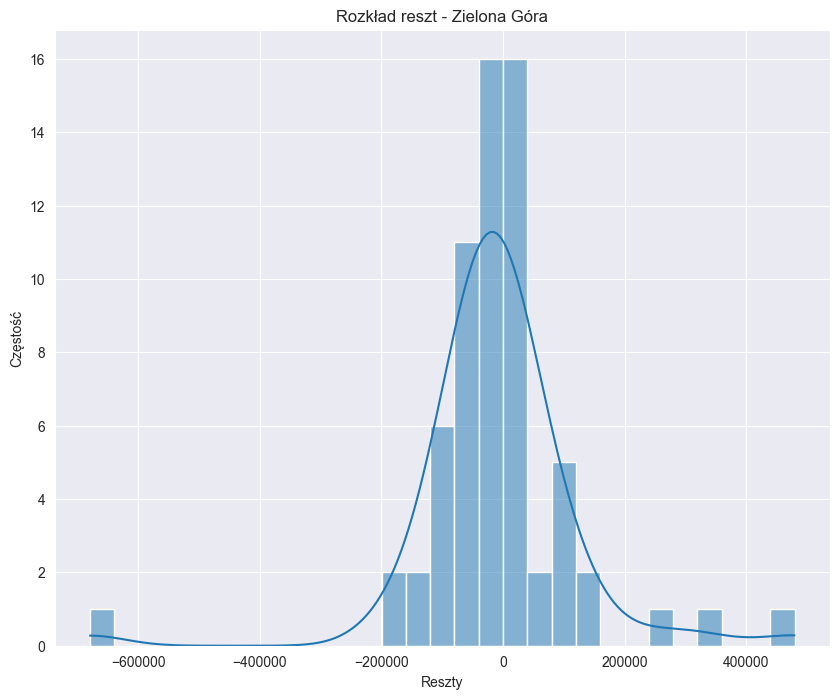

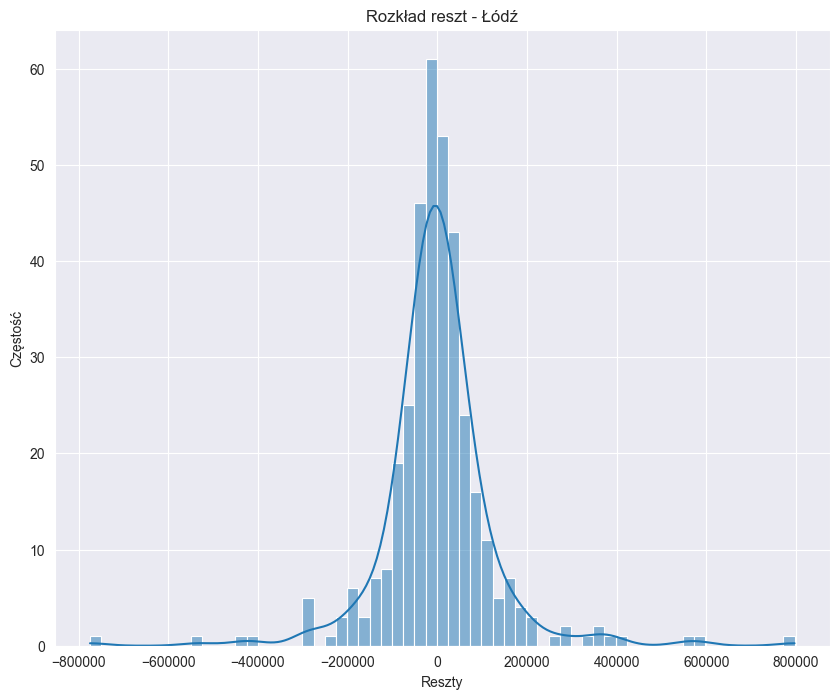

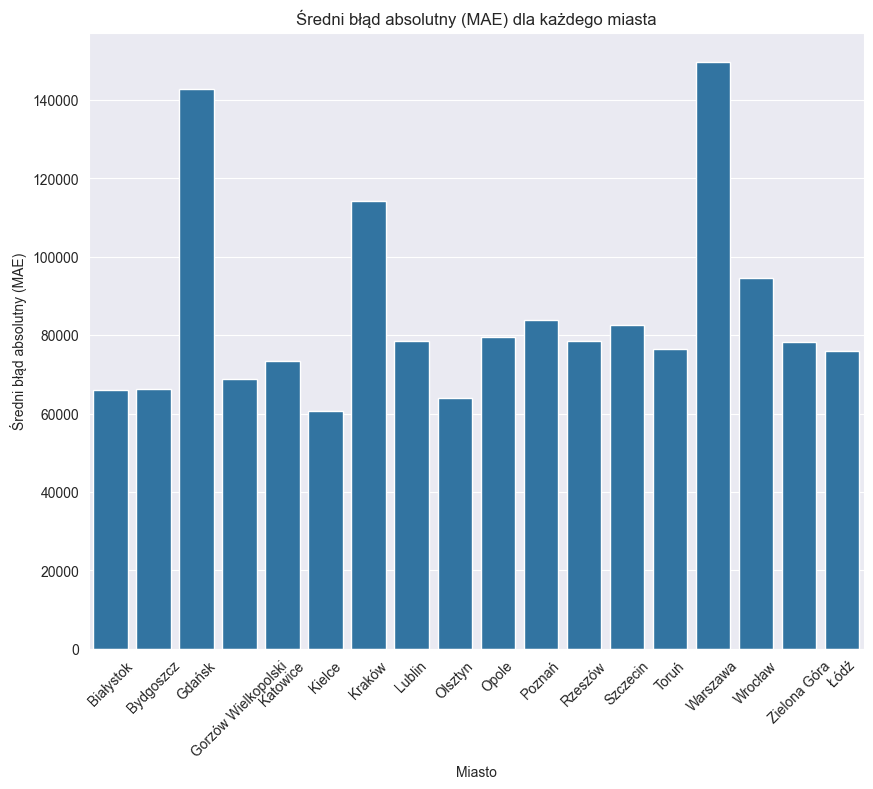

In [5]:
from src.model import HousingPricePredictor

print(len(preprocessor.preprocessed_data))

predictor = HousingPricePredictor(data,preprocessor=preprocessor)


predicted_price = predictor.predict_price(city='Poznań')
print(f'Przewidywana cena mieszkania: {predicted_price:.2f} PLN')

# mae = predictor.evaluate_model_by_city()
# print(predictor.evaluate_model())
# for city, mae_value in mae.items():
#     print(f'Średni błąd bezwzględny dla miasta {city}: {mae_value:.2f} PLN')

#predictor.plot_feature_importance()
predictor.plot_actual_vs_predicted_by_city()
predictor.plot_residuals_by_city()
predictor.plot_mae_by_city()